In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders


# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
states_data = pd.read_csv('us_counties_covid19_daily.csv')

In [ ]:
states_data.head()

In [ ]:
states_data.info()
states_data.isnull().sum()
states_data.sort_values('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432243 entries, 0 to 432242
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    432243 non-null  object 
 1   county  432243 non-null  object 
 2   state   432243 non-null  object 
 3   fips    428044 non-null  float64
 4   cases   432243 non-null  int64  
 5   deaths  424401 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 19.8+ MB


**Visualizing all states deaths and cases**


In [3]:
states_data.drop(['county', 'fips'], axis=1, inplace=True)

In [ ]:

states= {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}



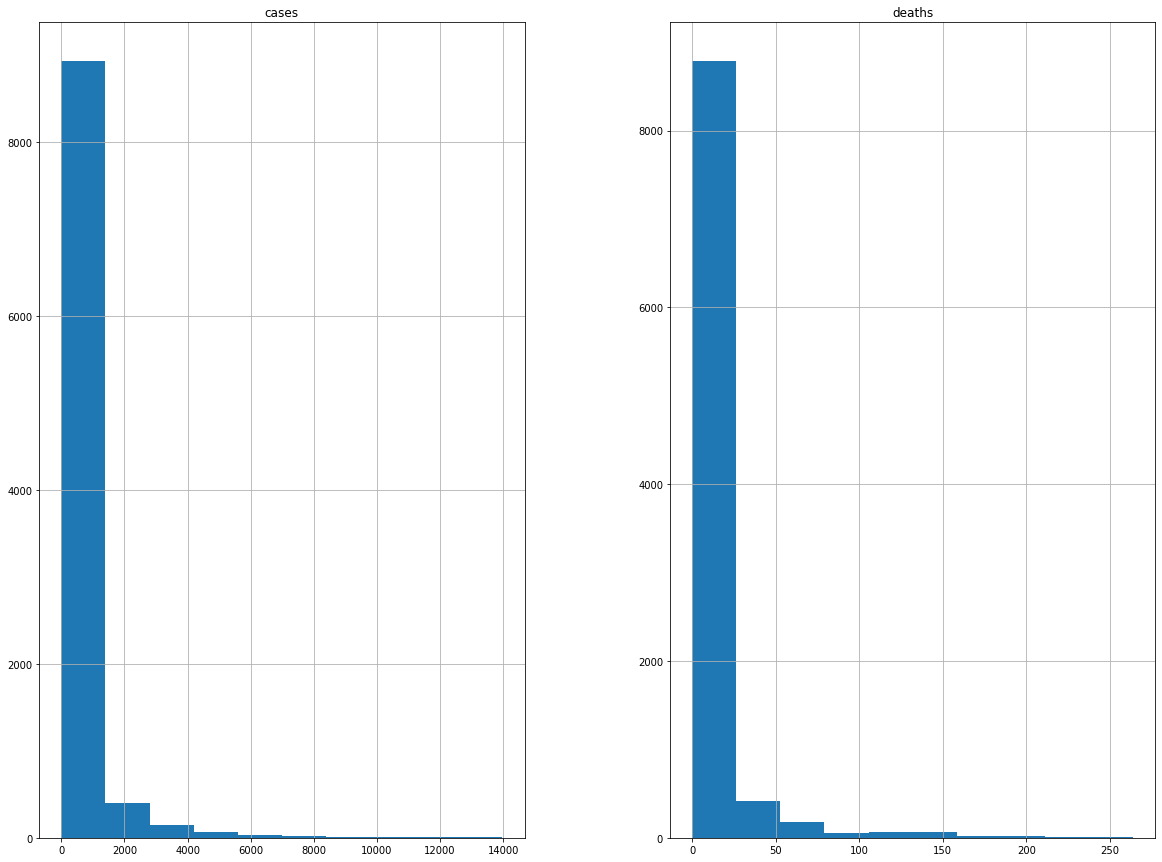

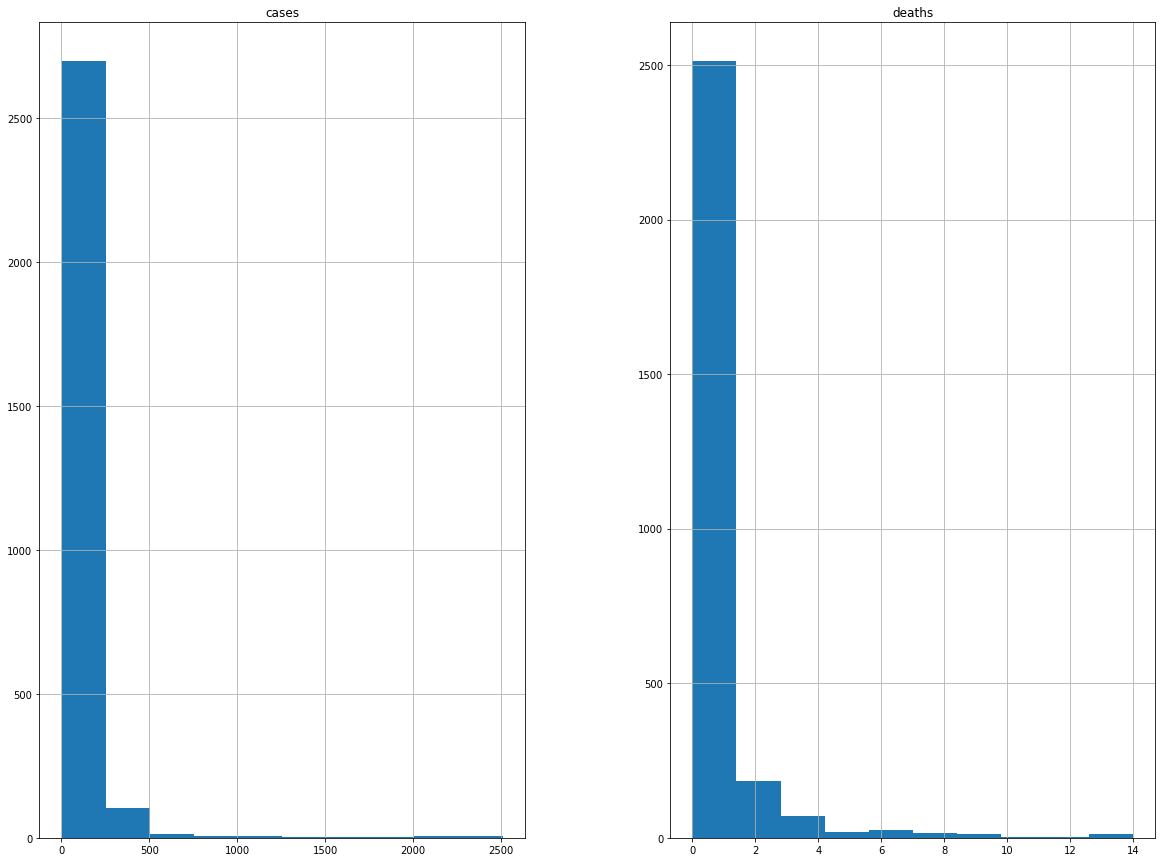

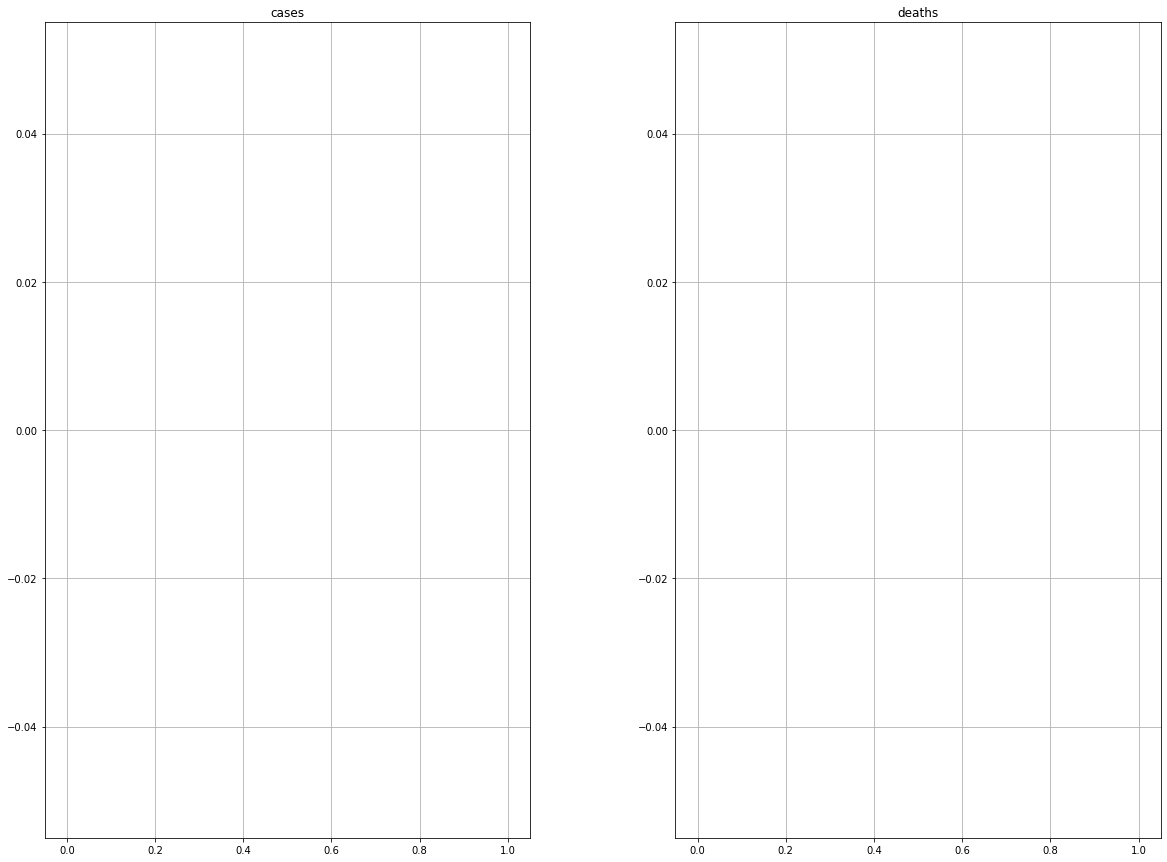

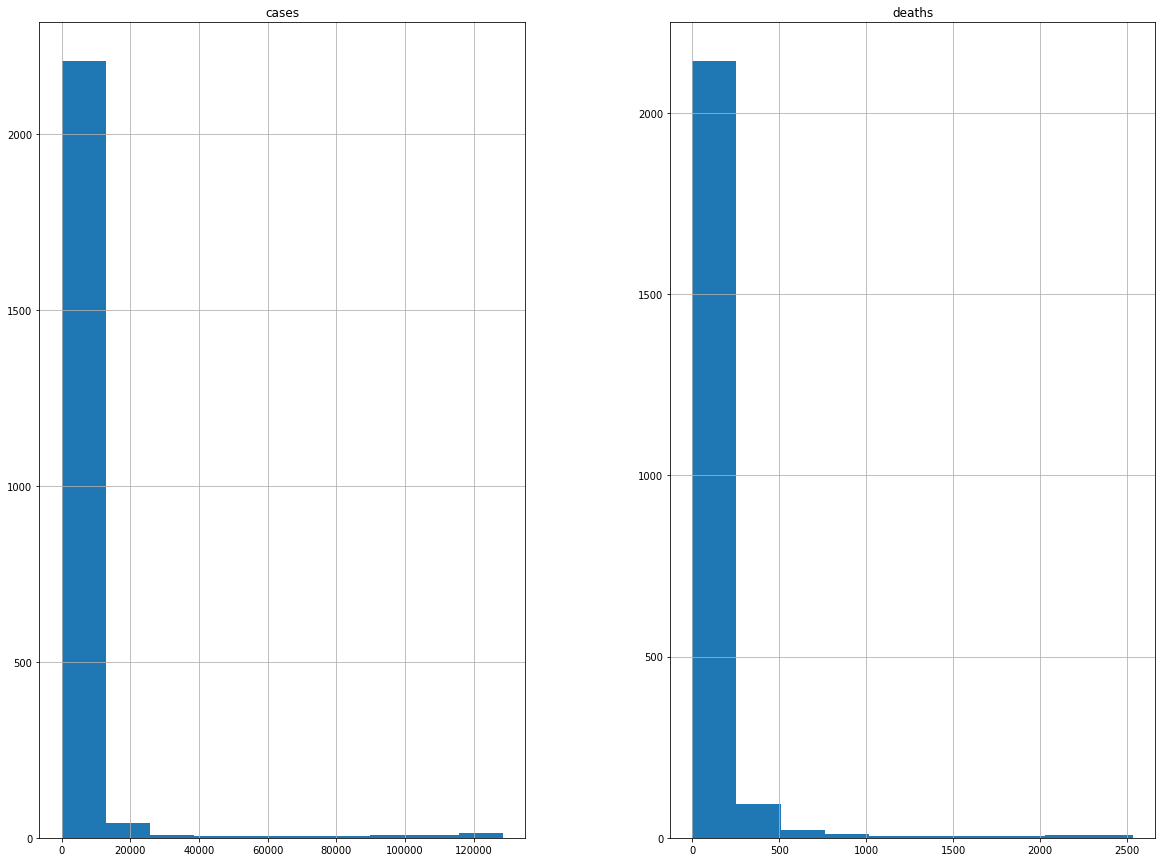

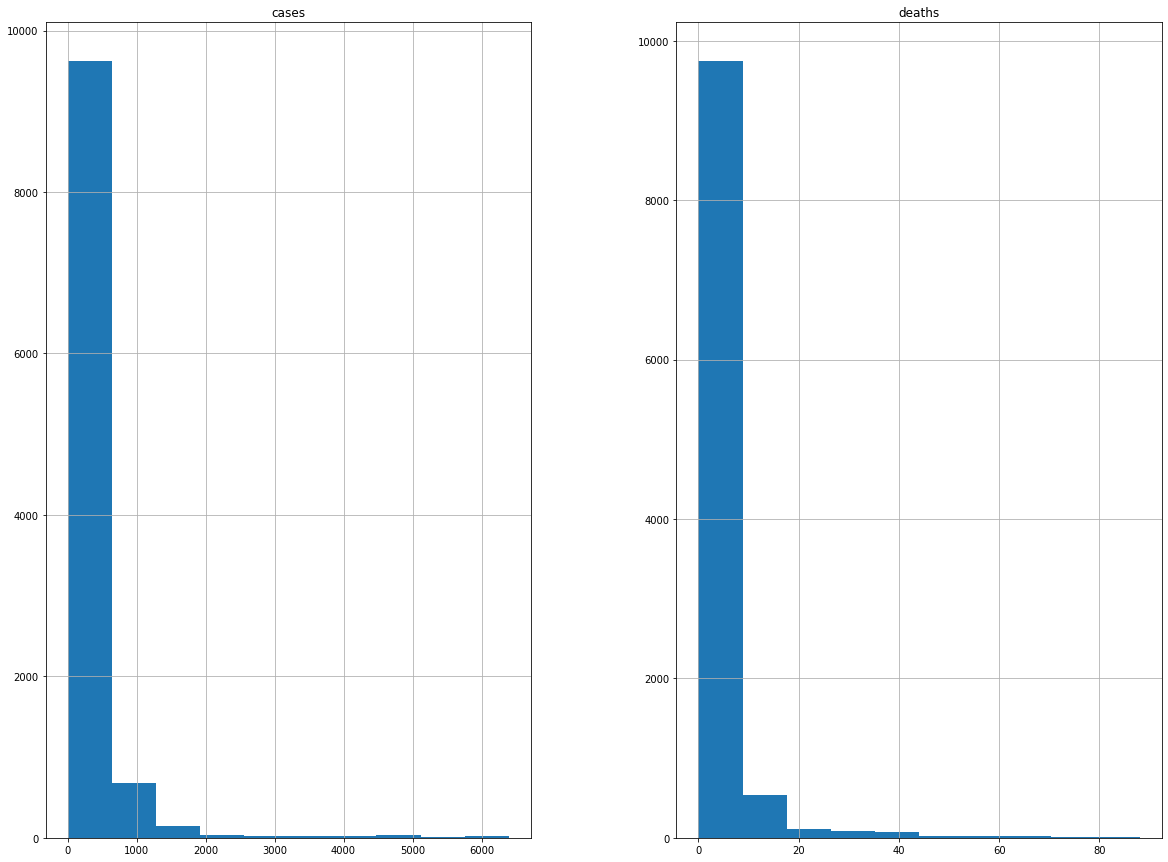

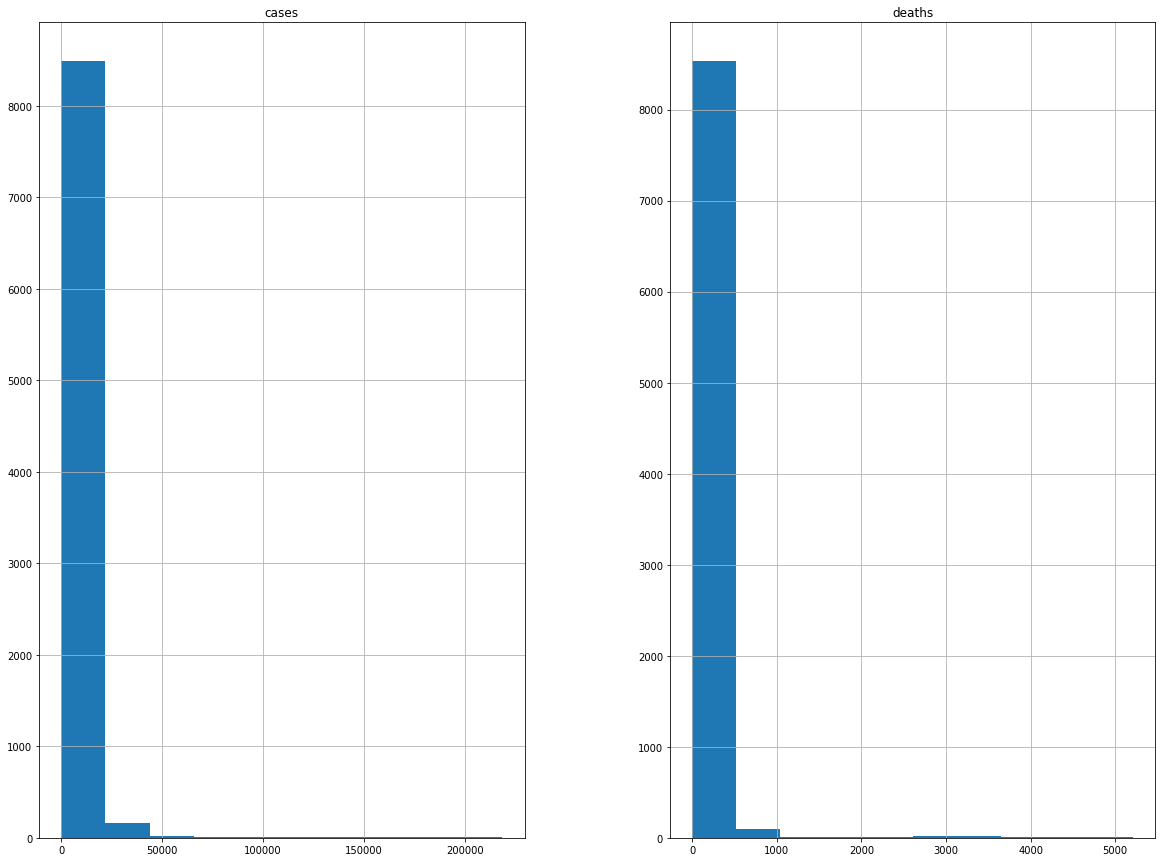

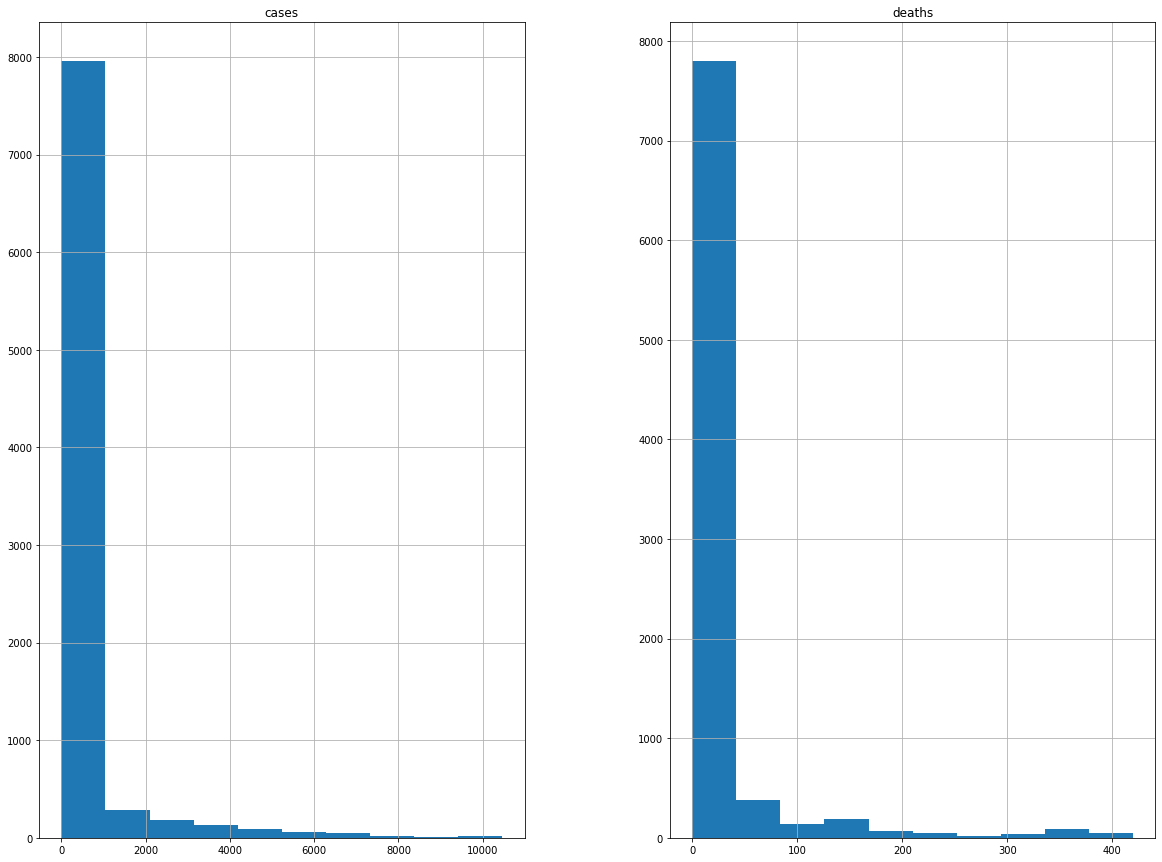

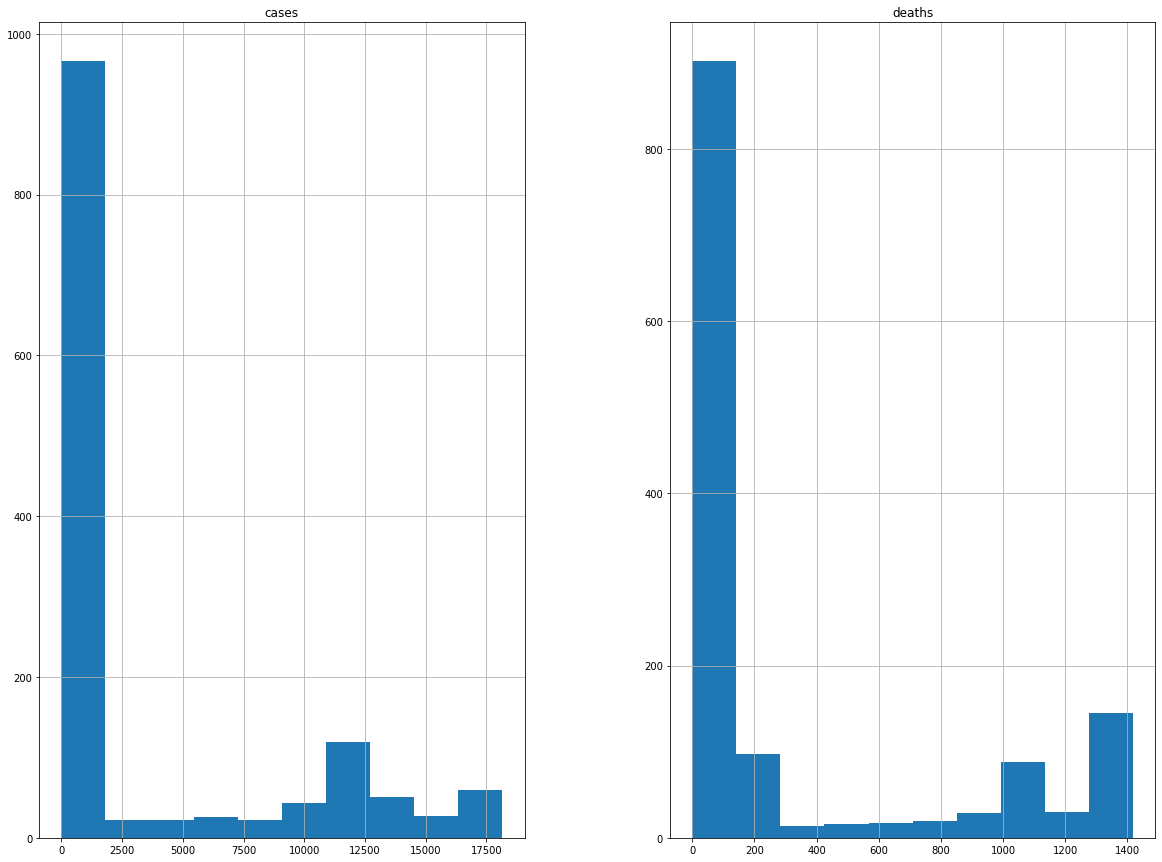

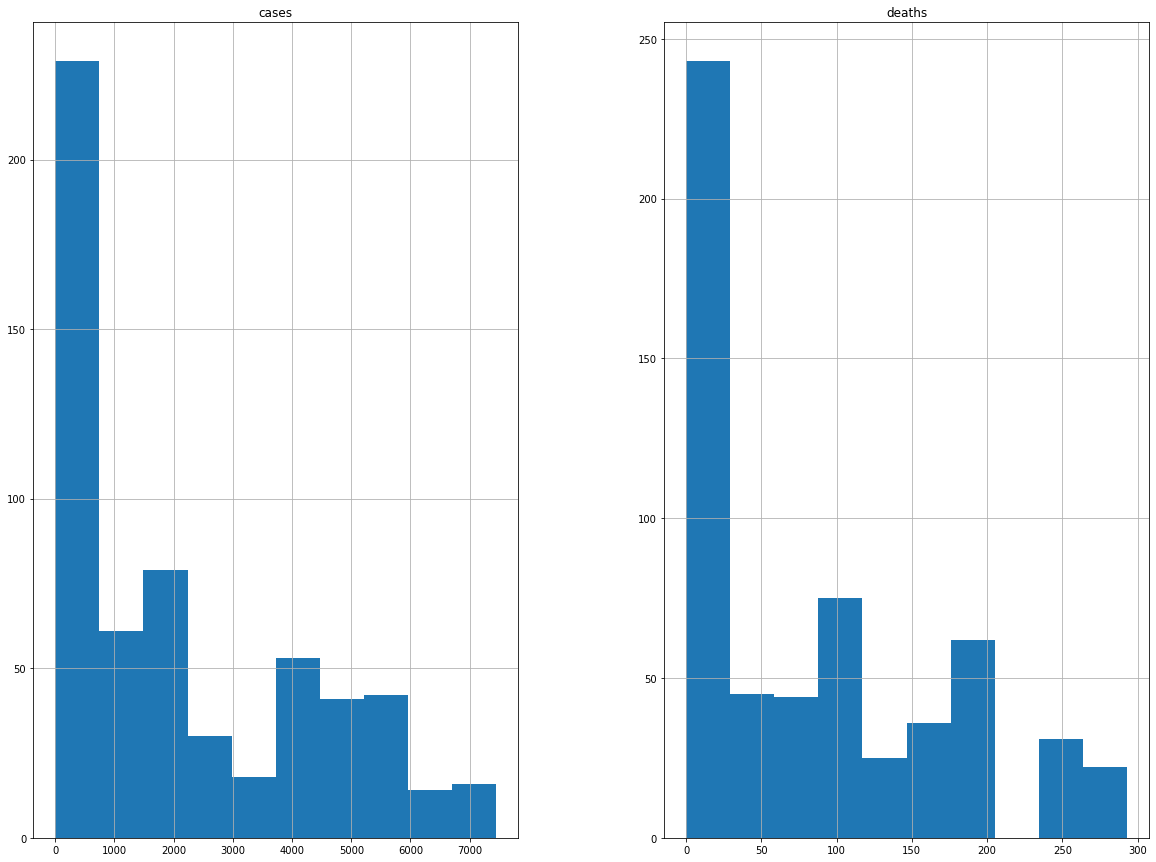

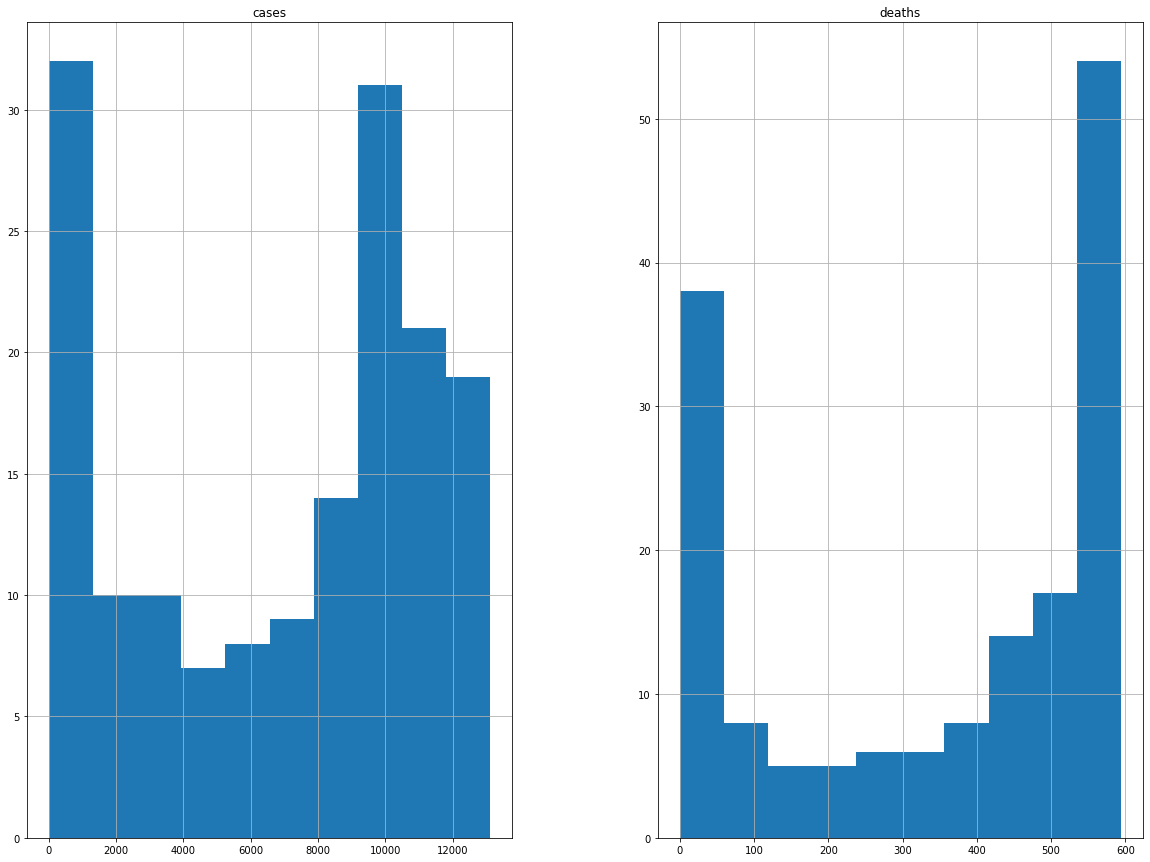

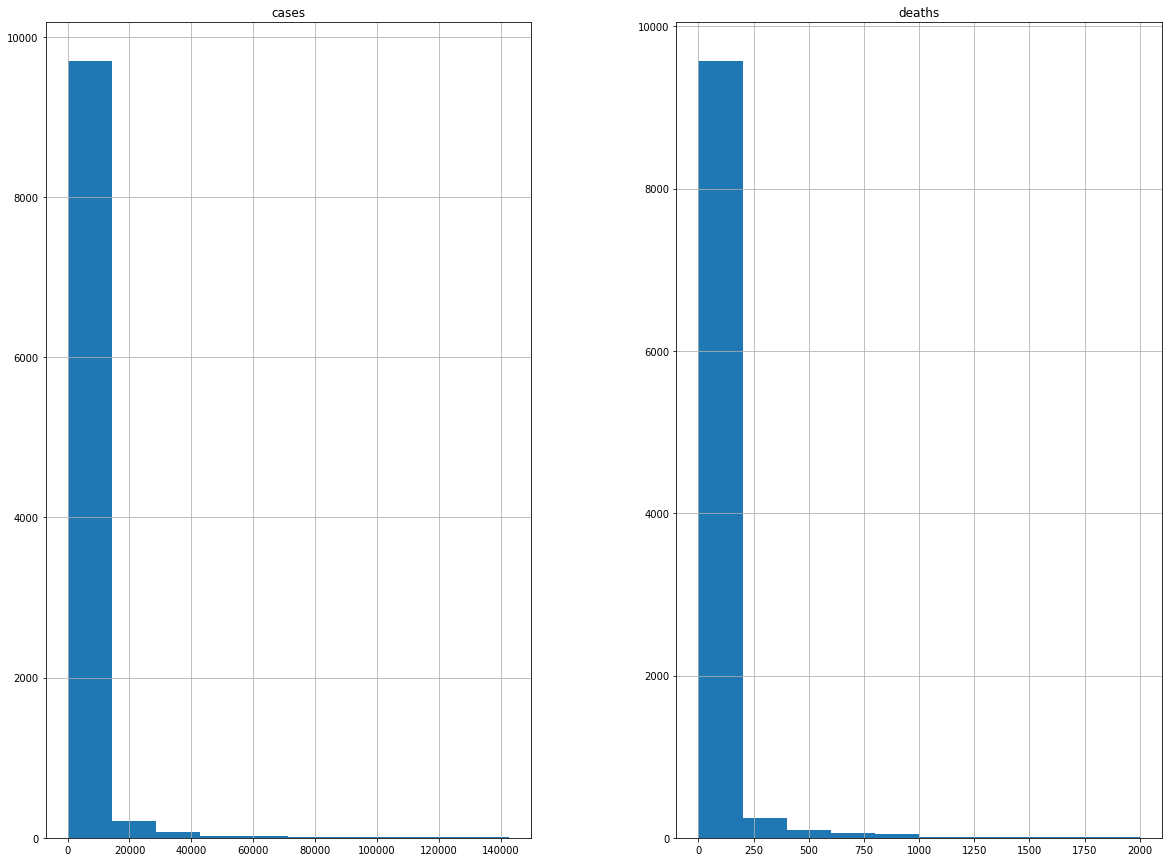

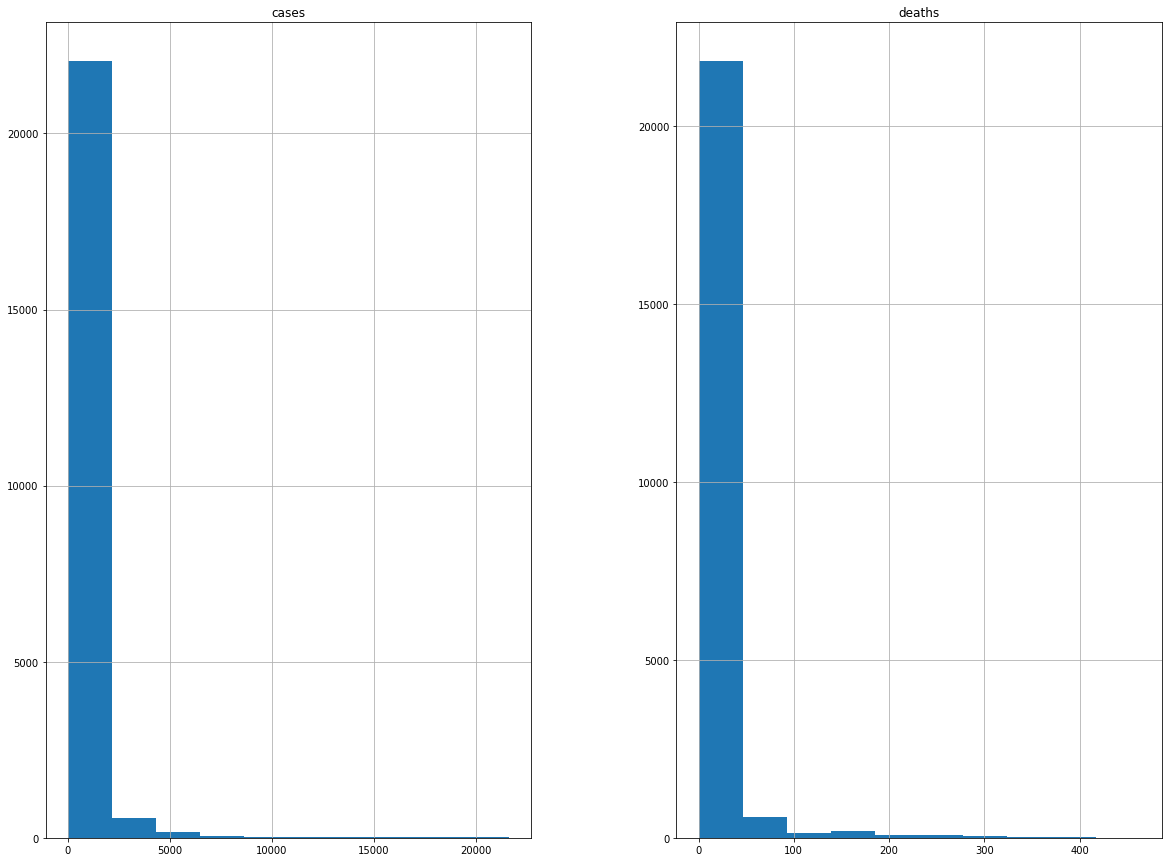

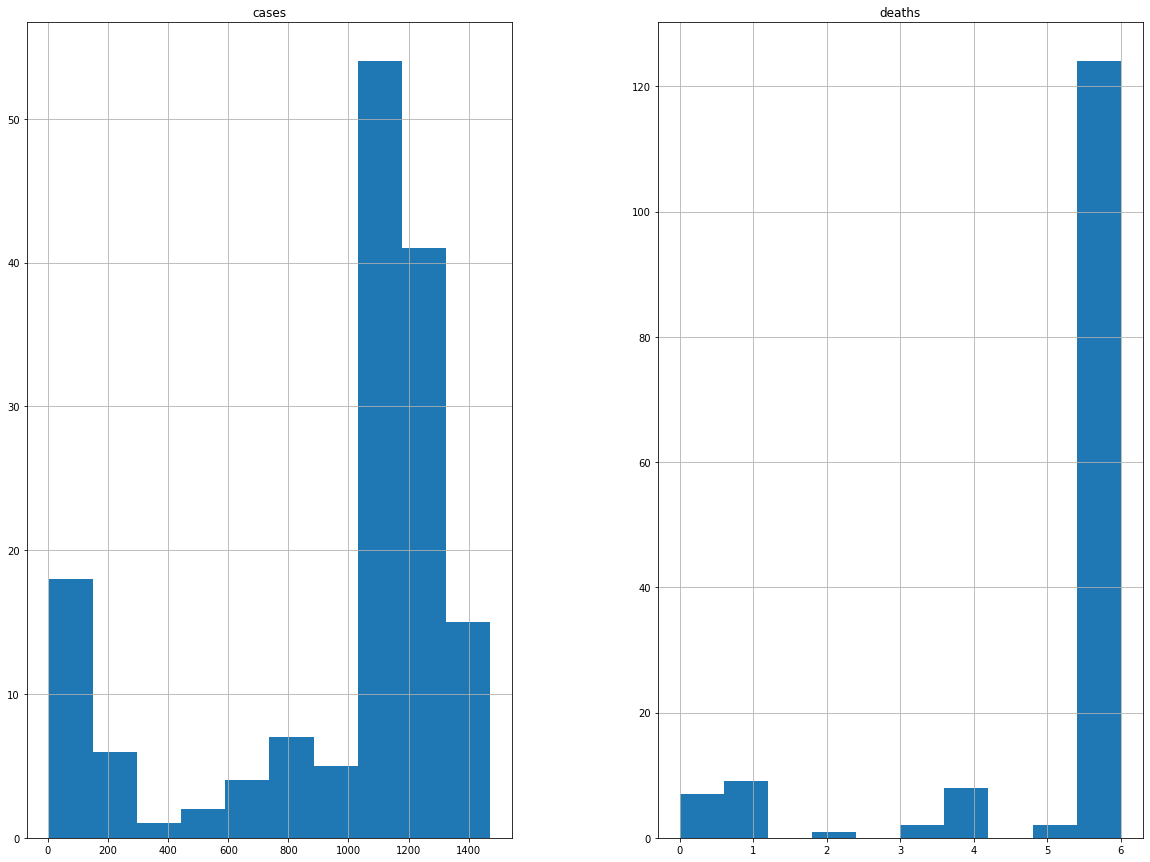

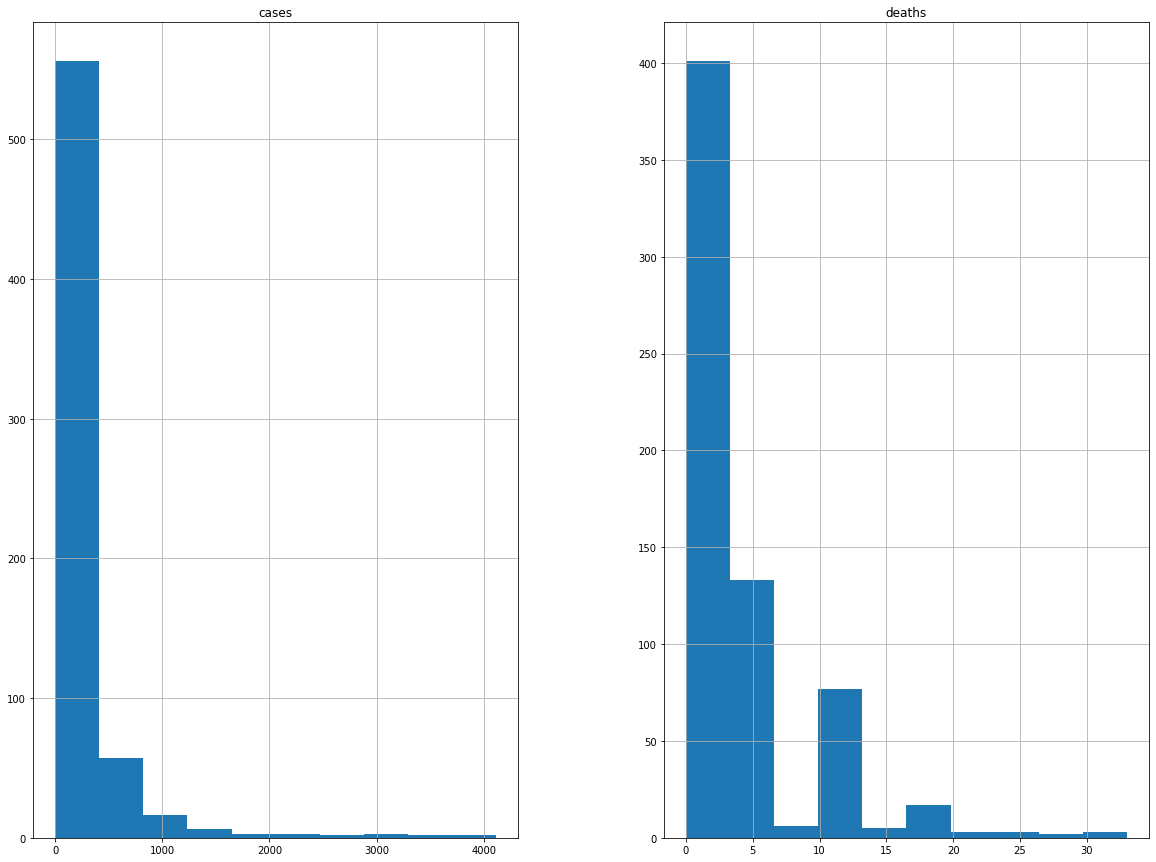

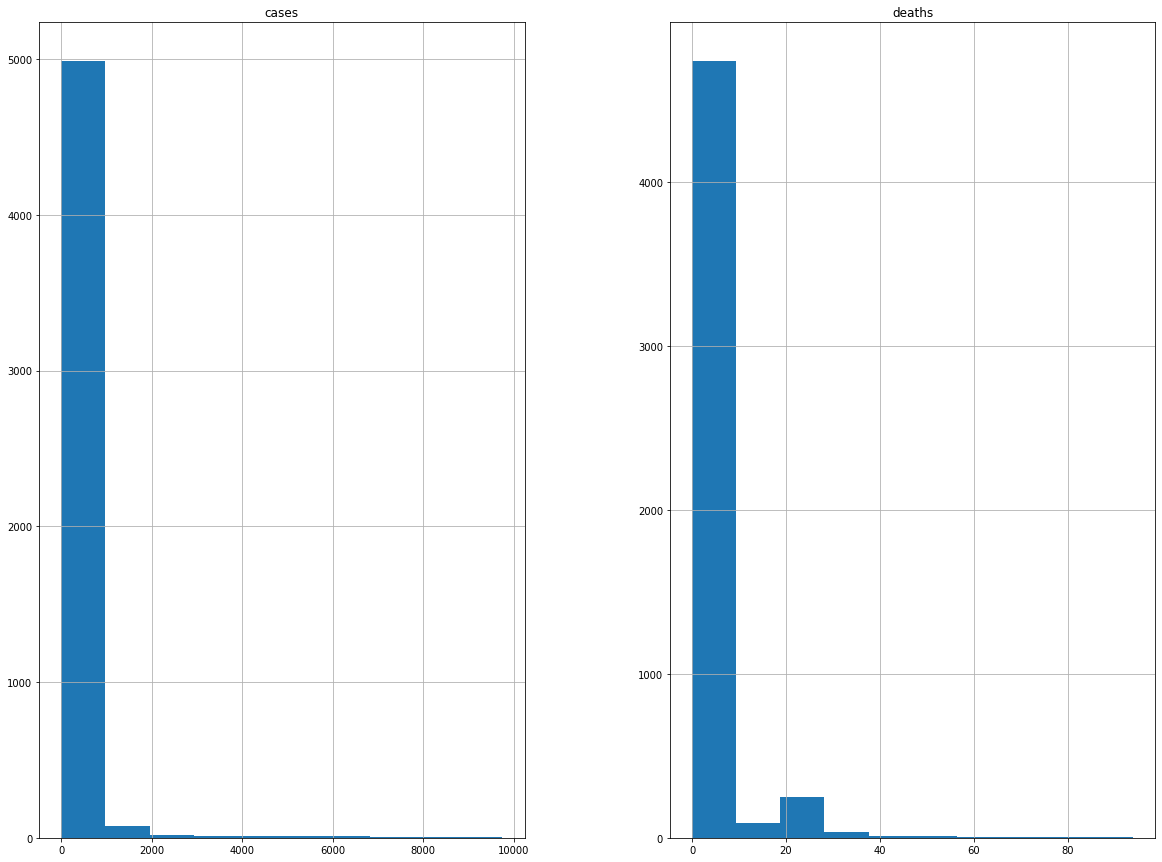

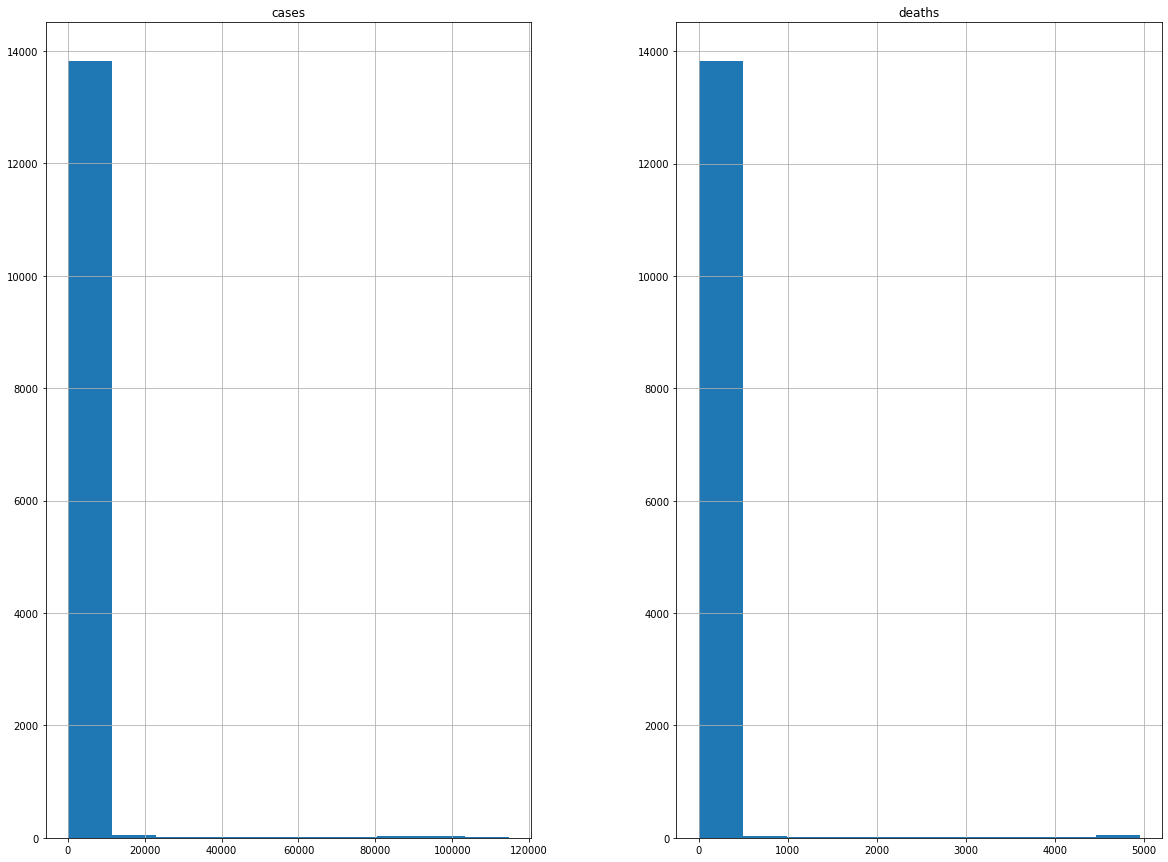

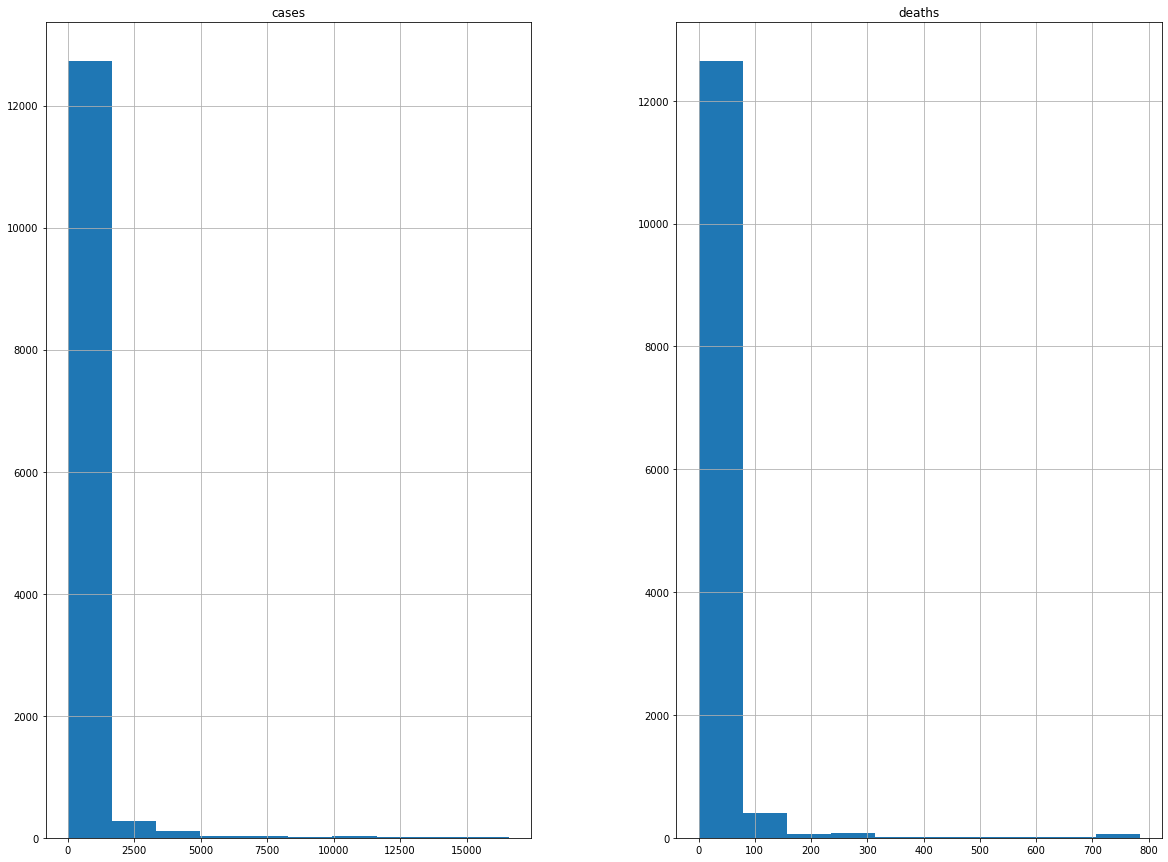

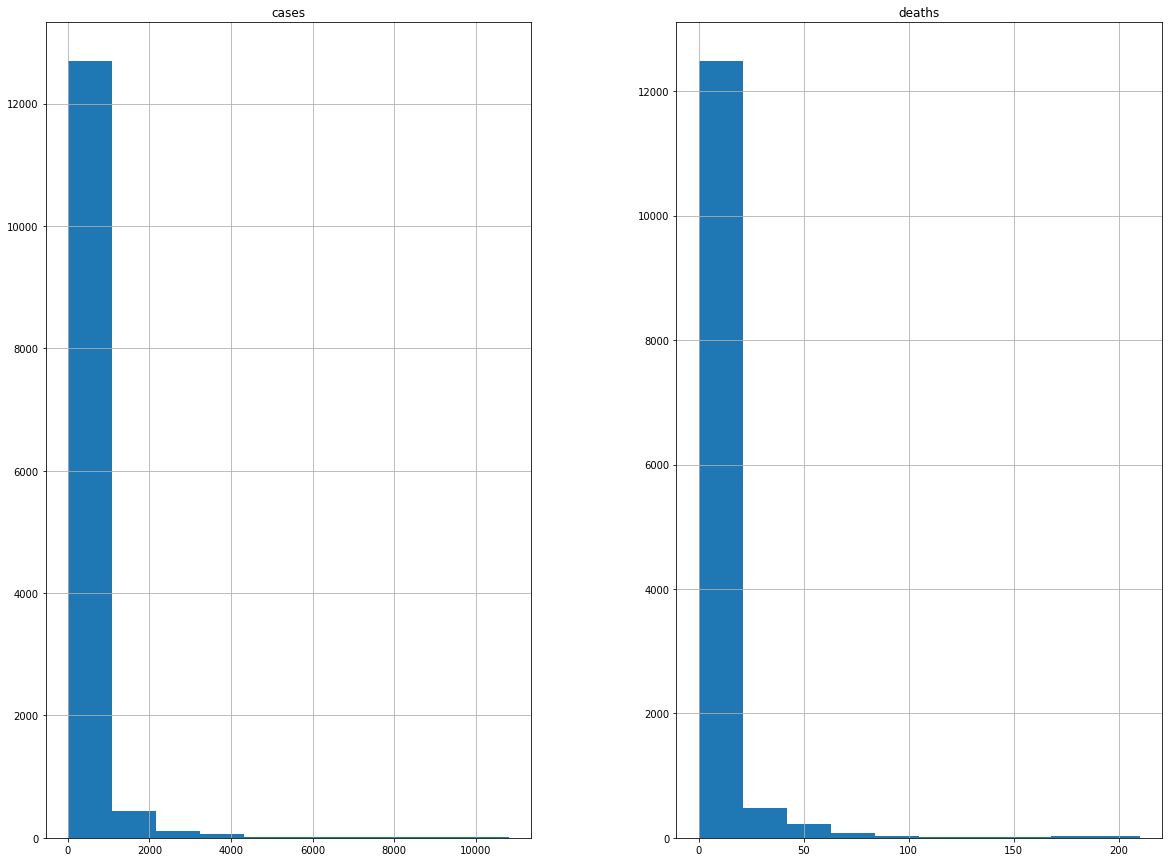

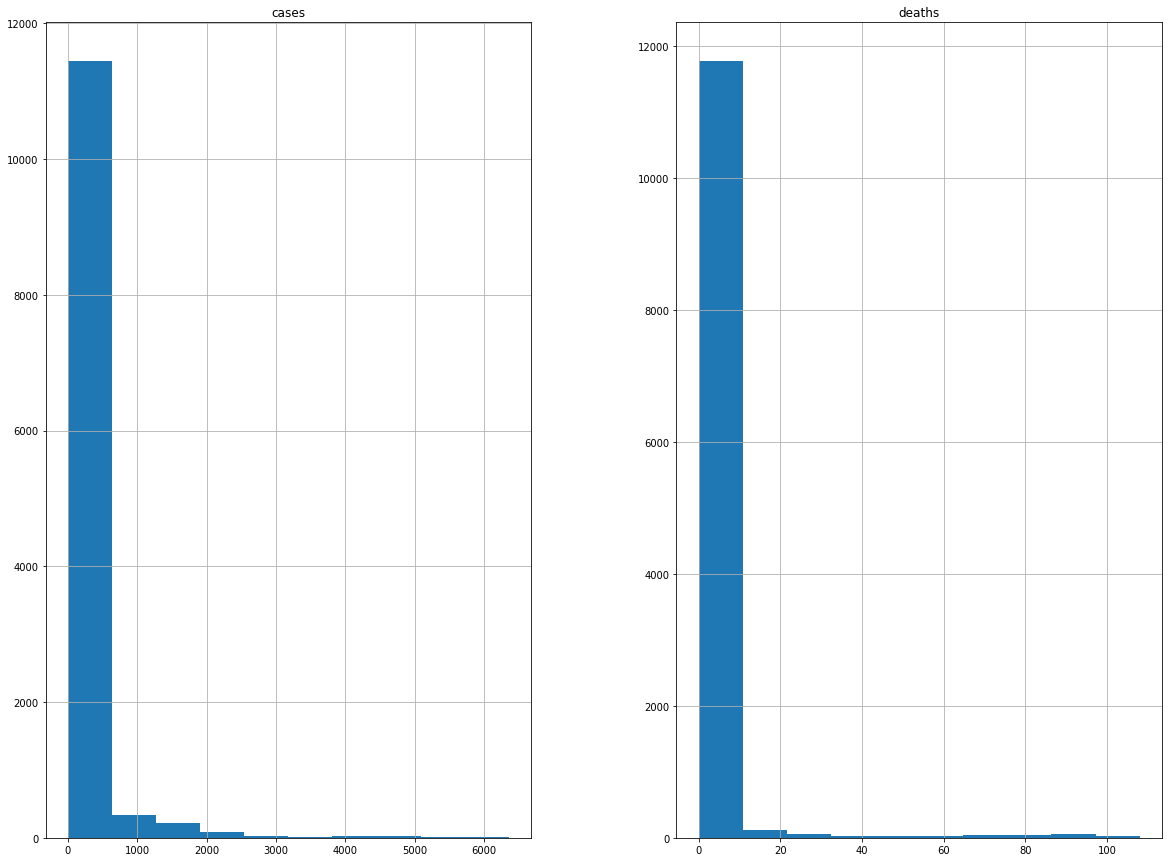

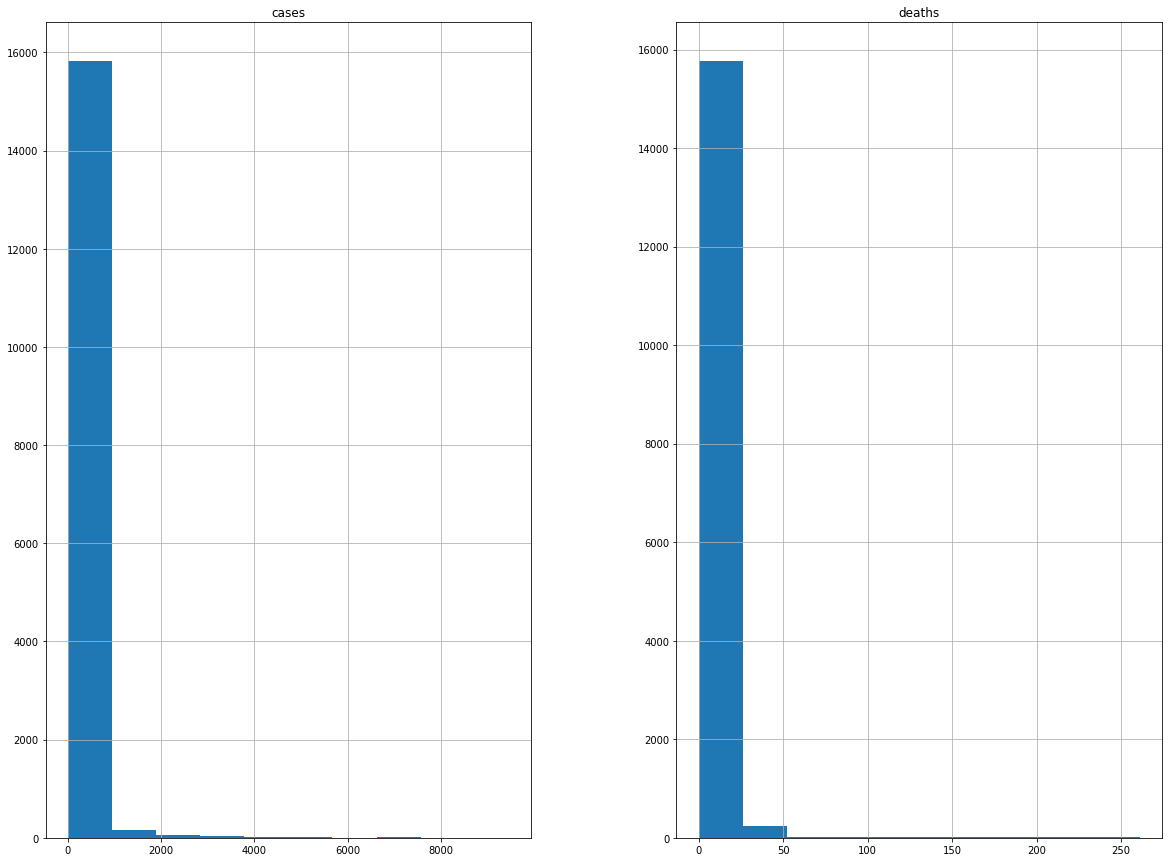

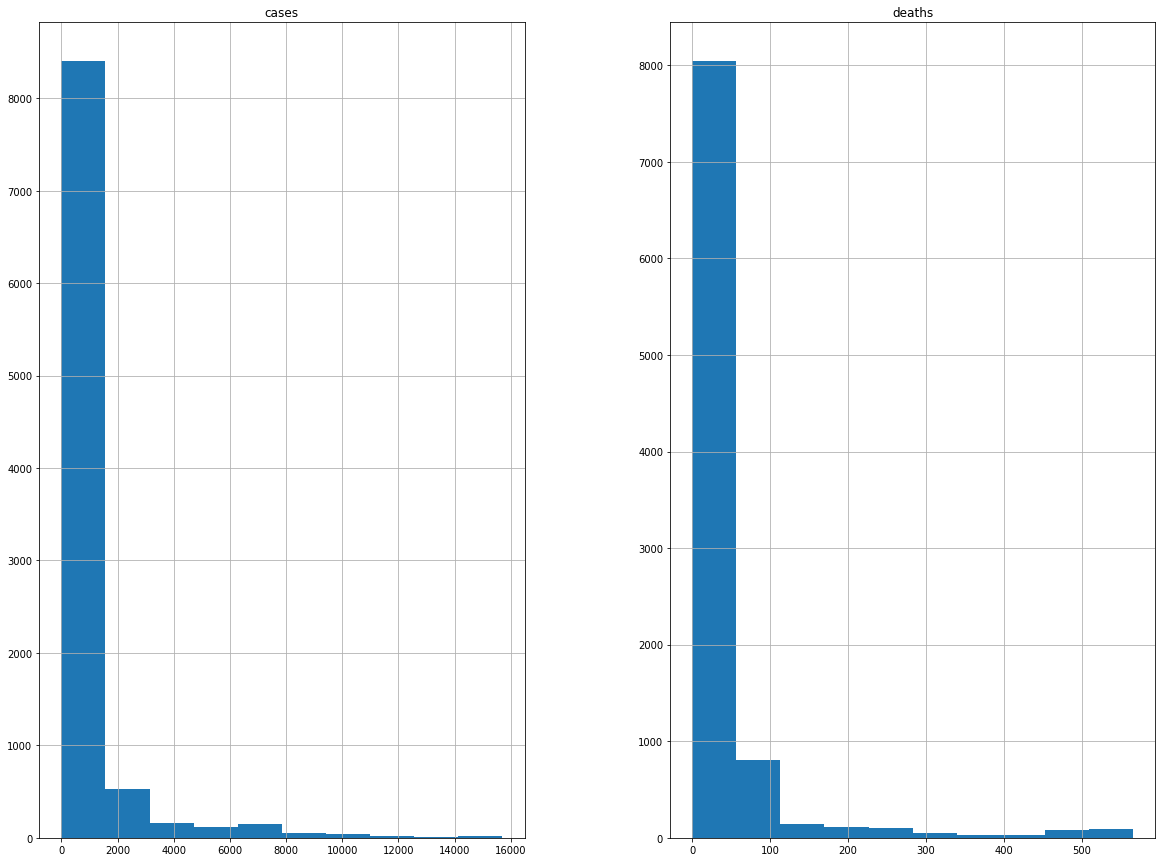

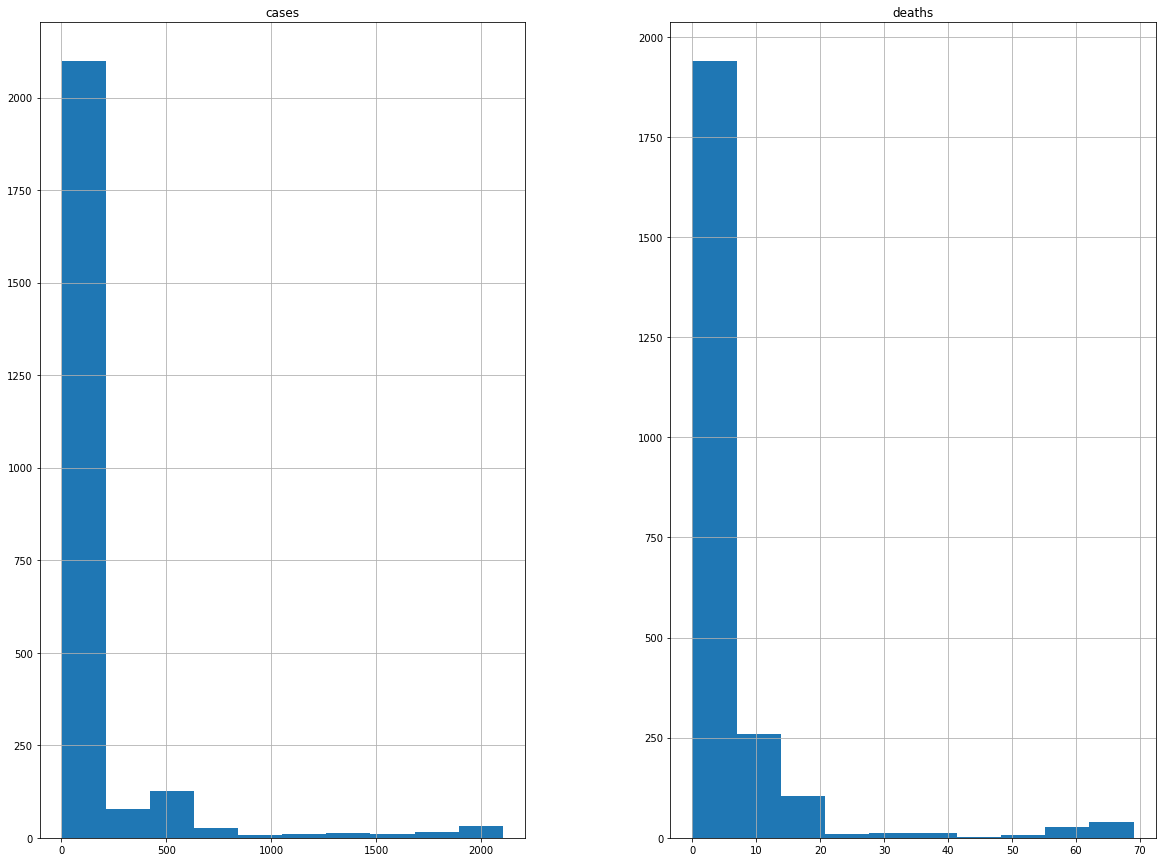

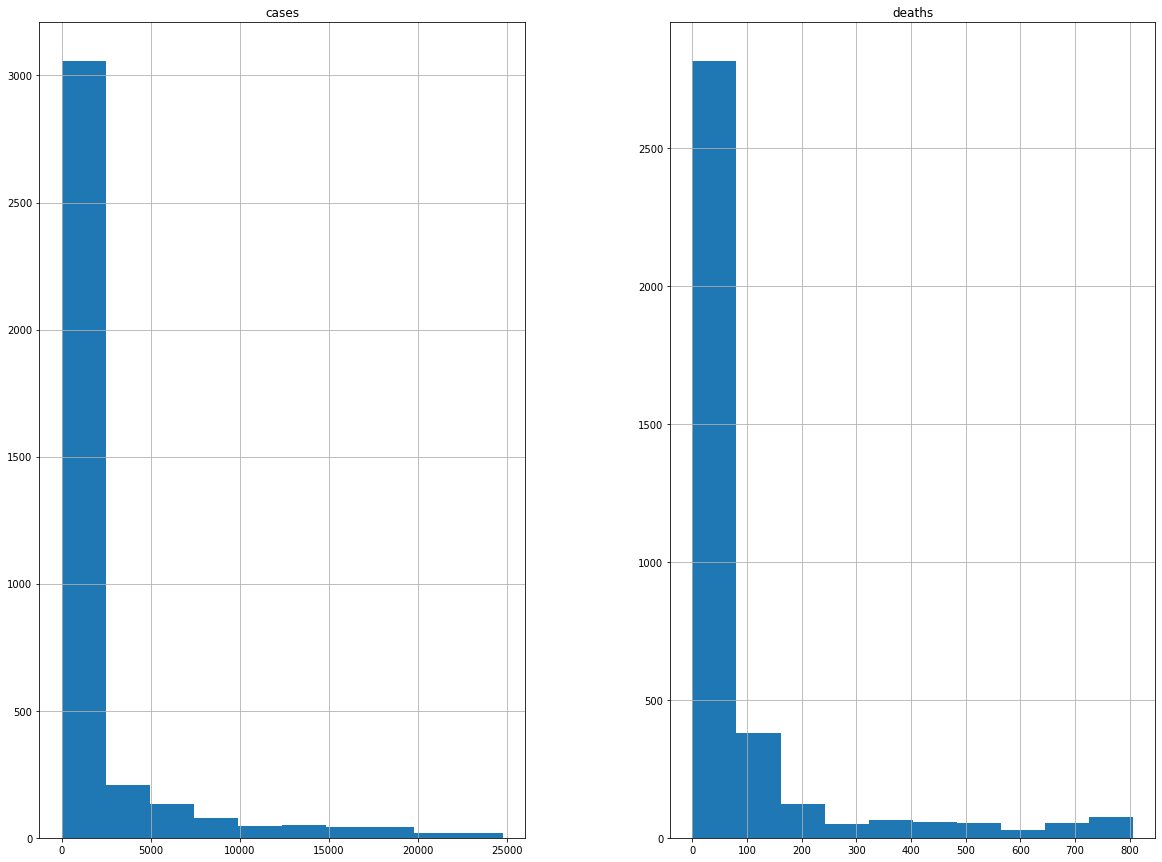

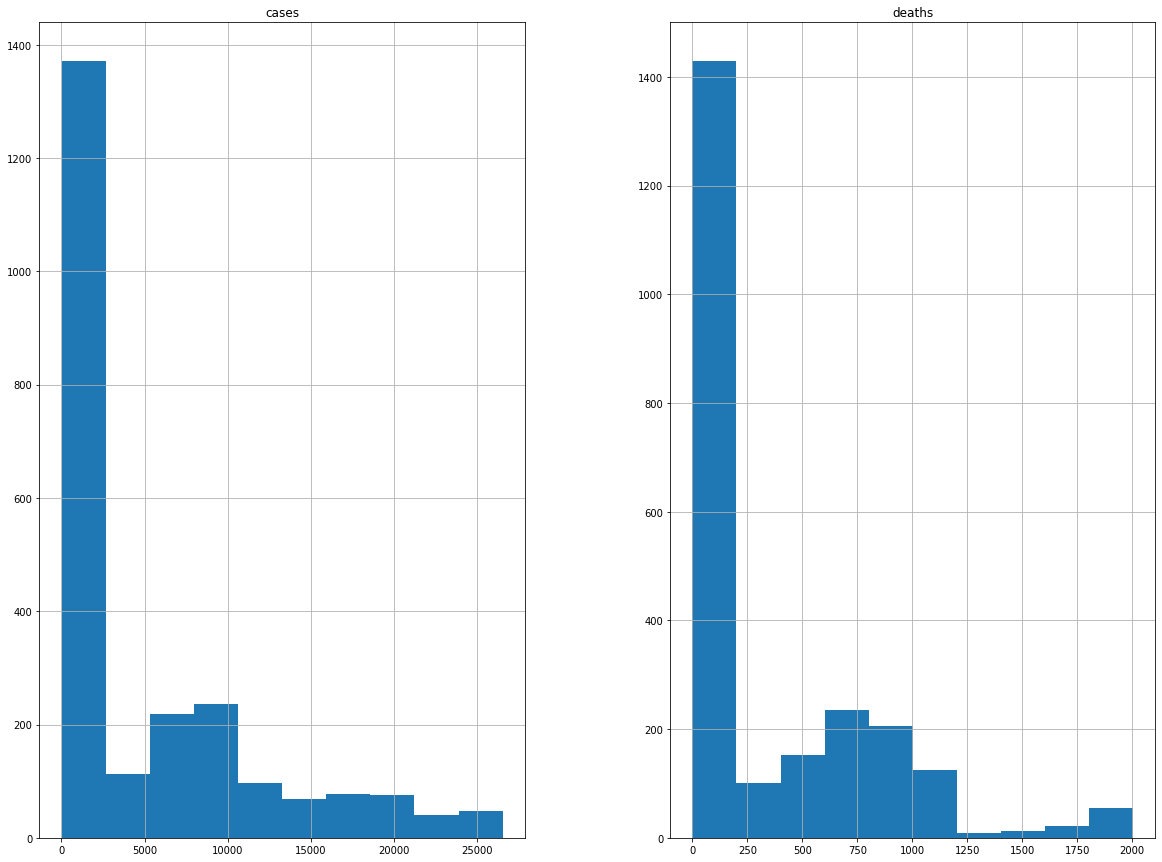

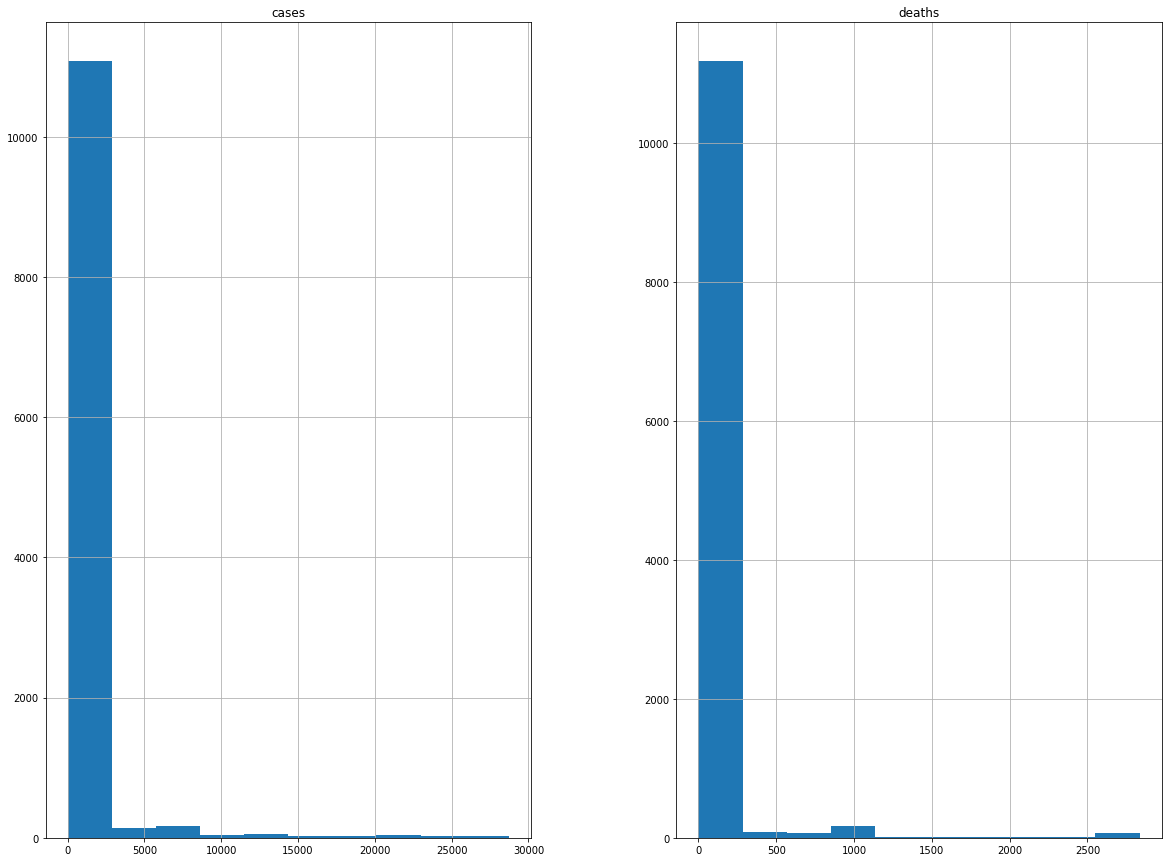

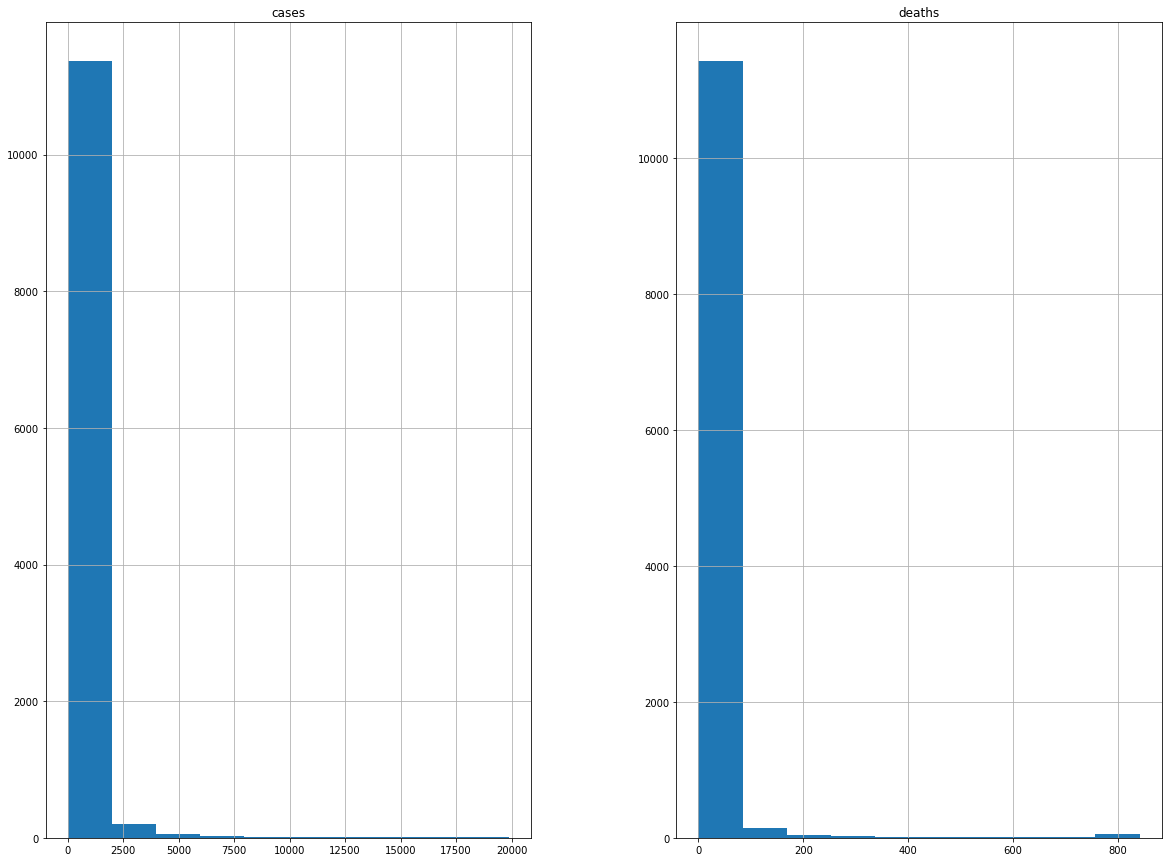

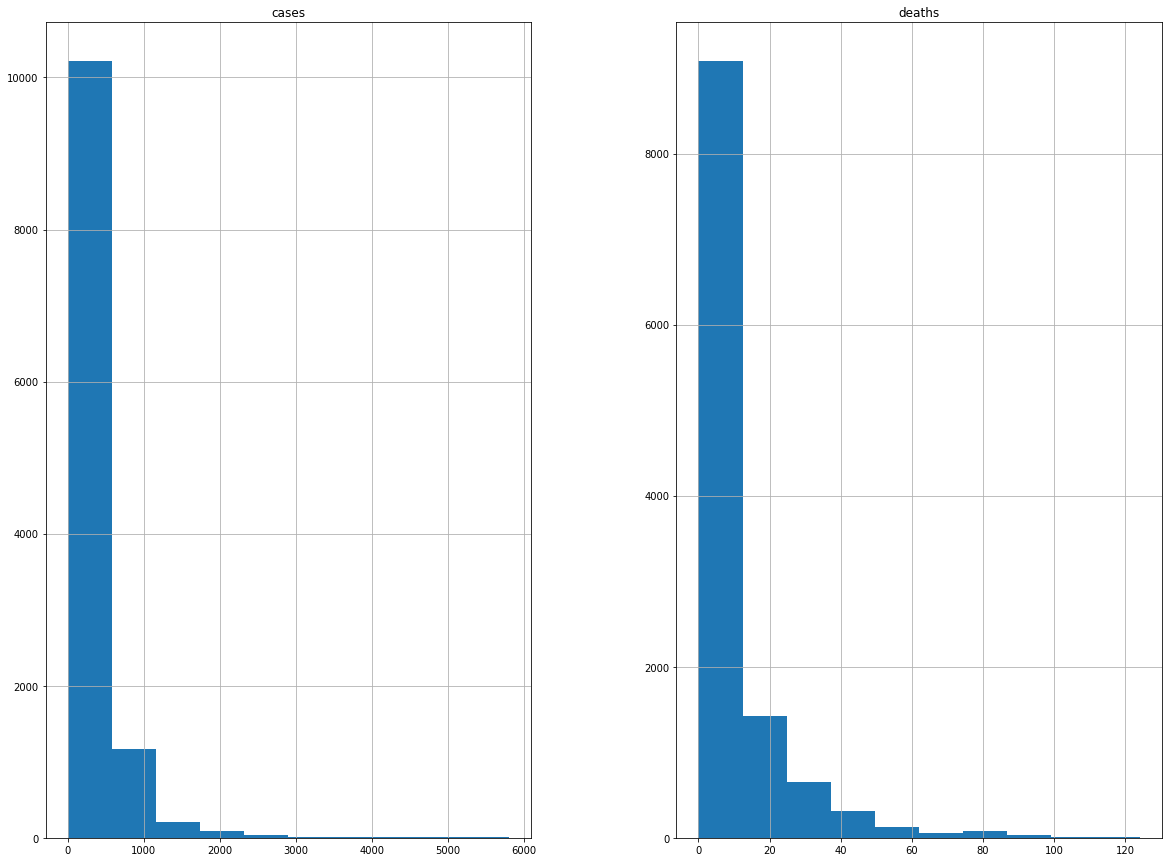

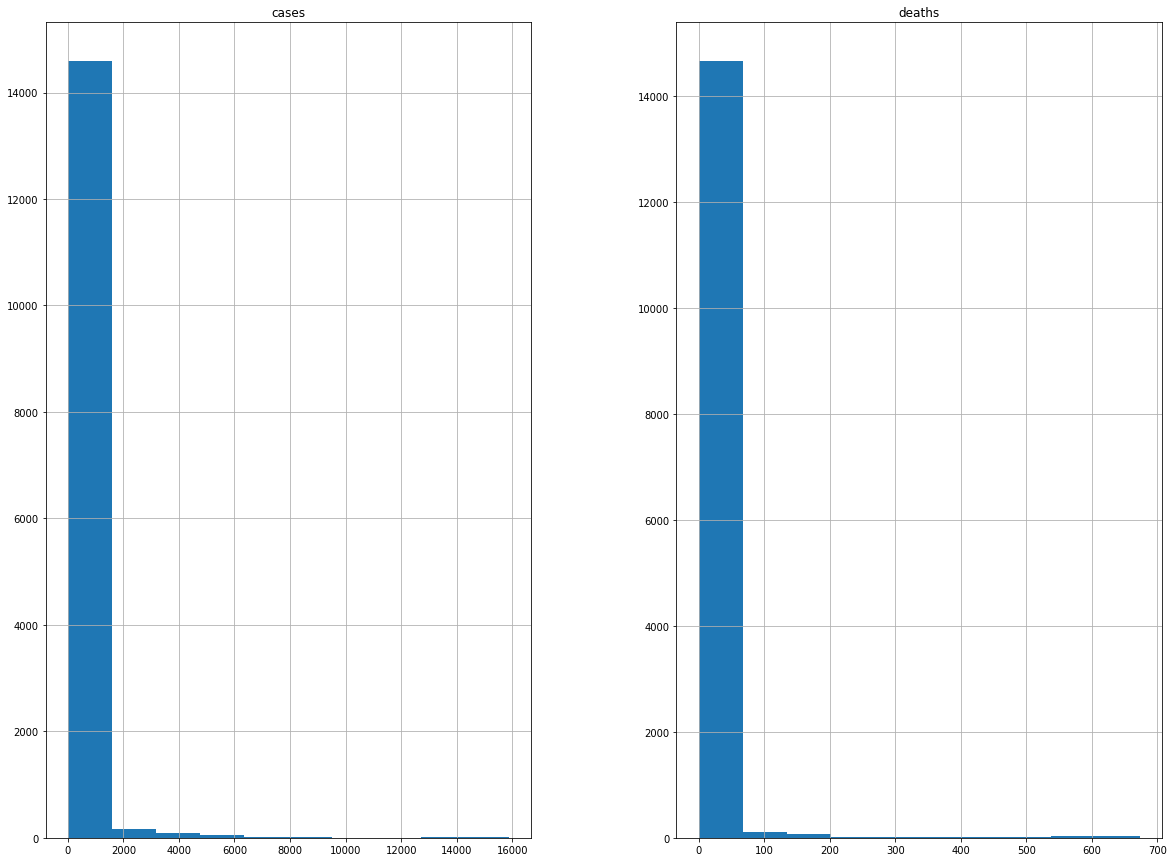

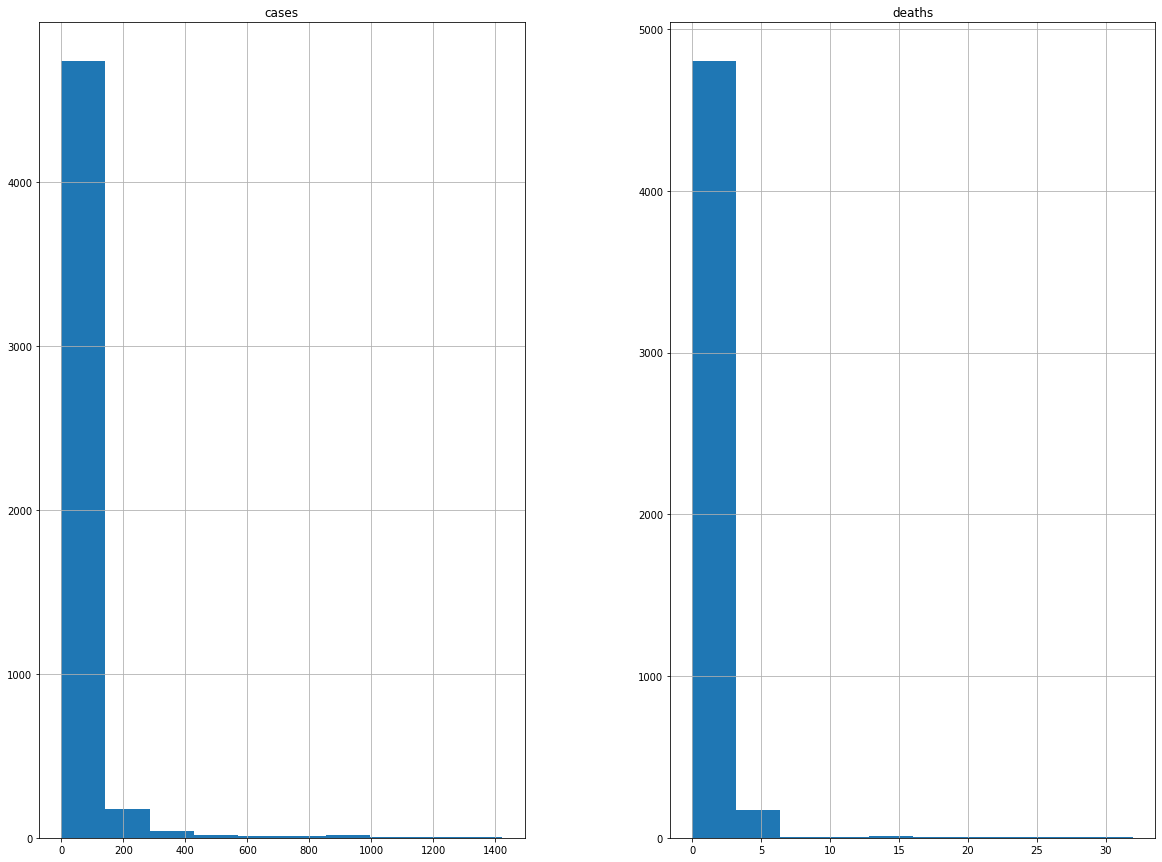

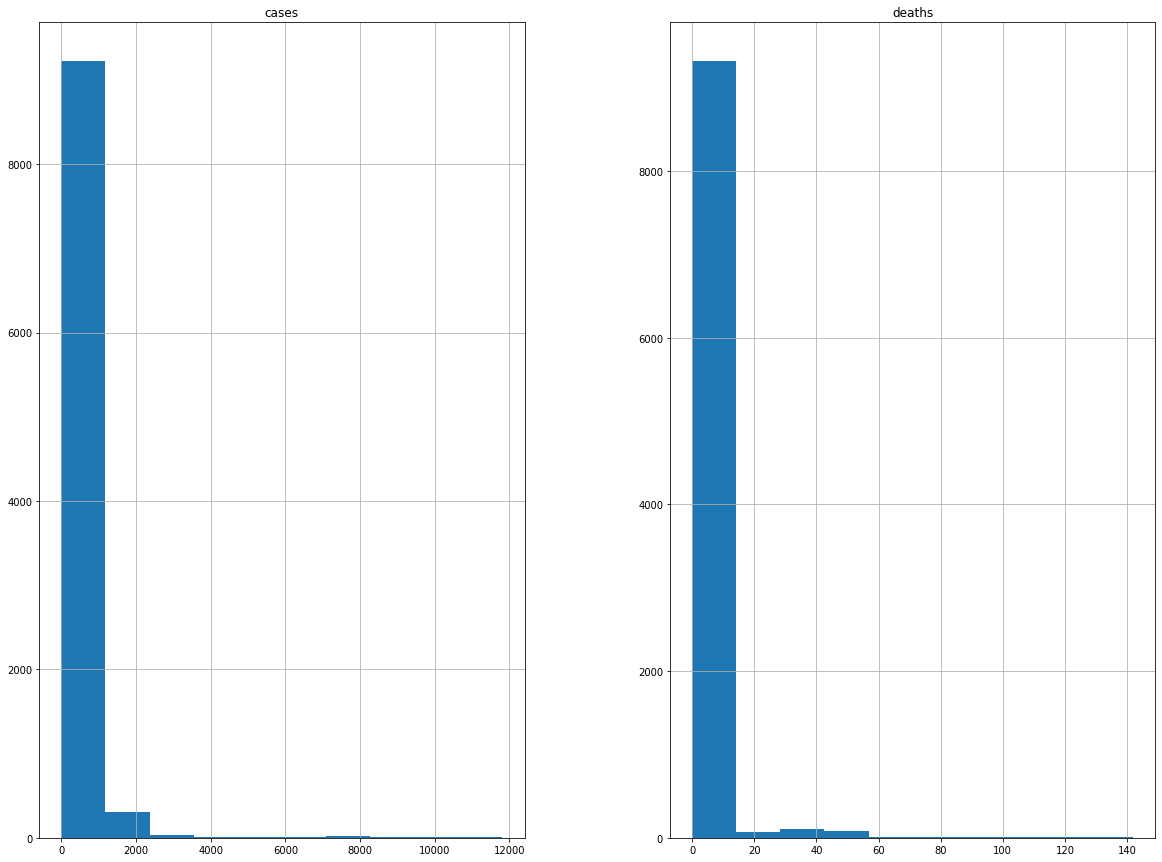

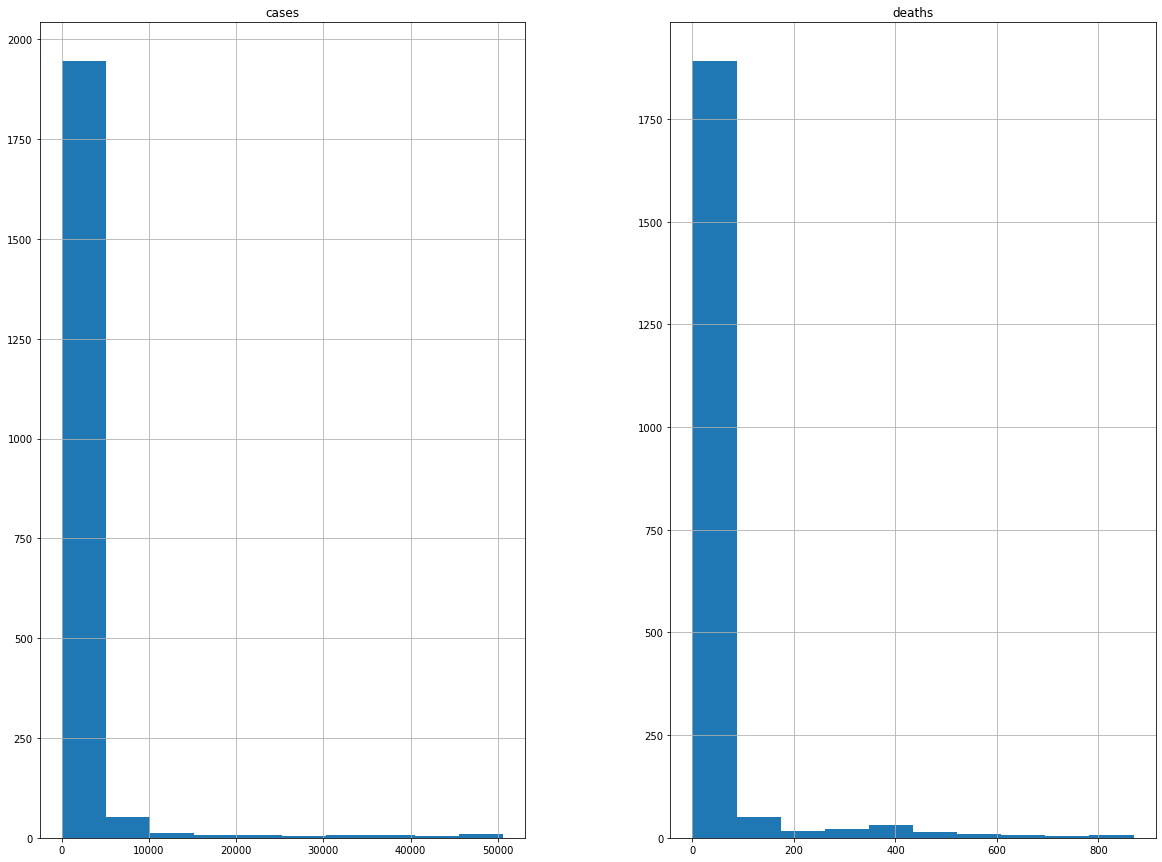

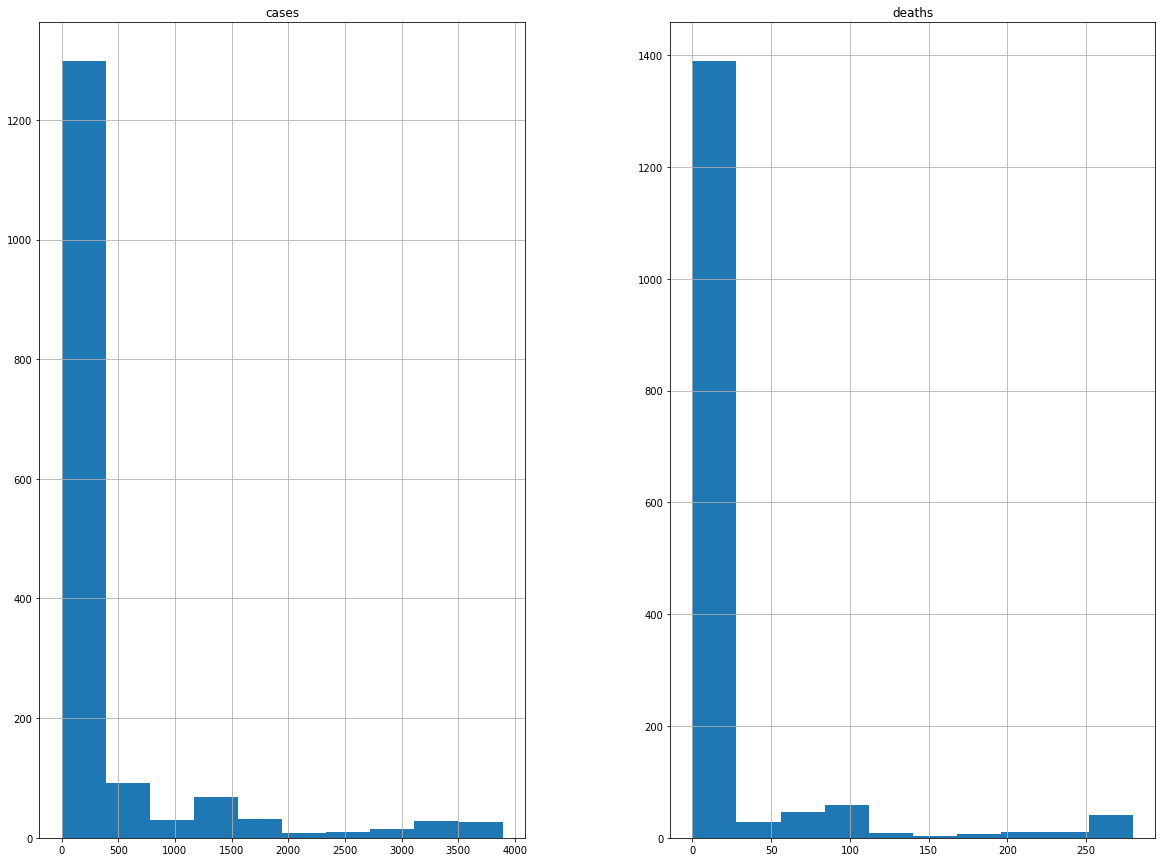

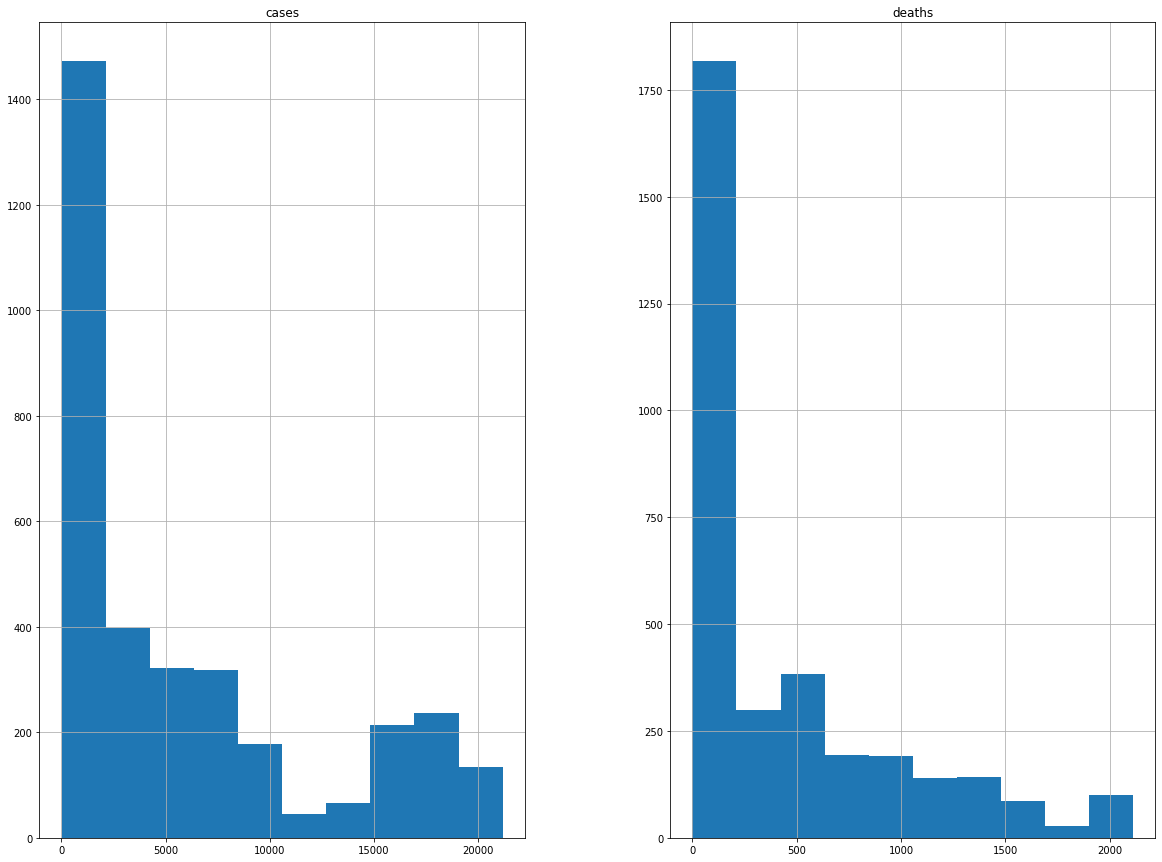

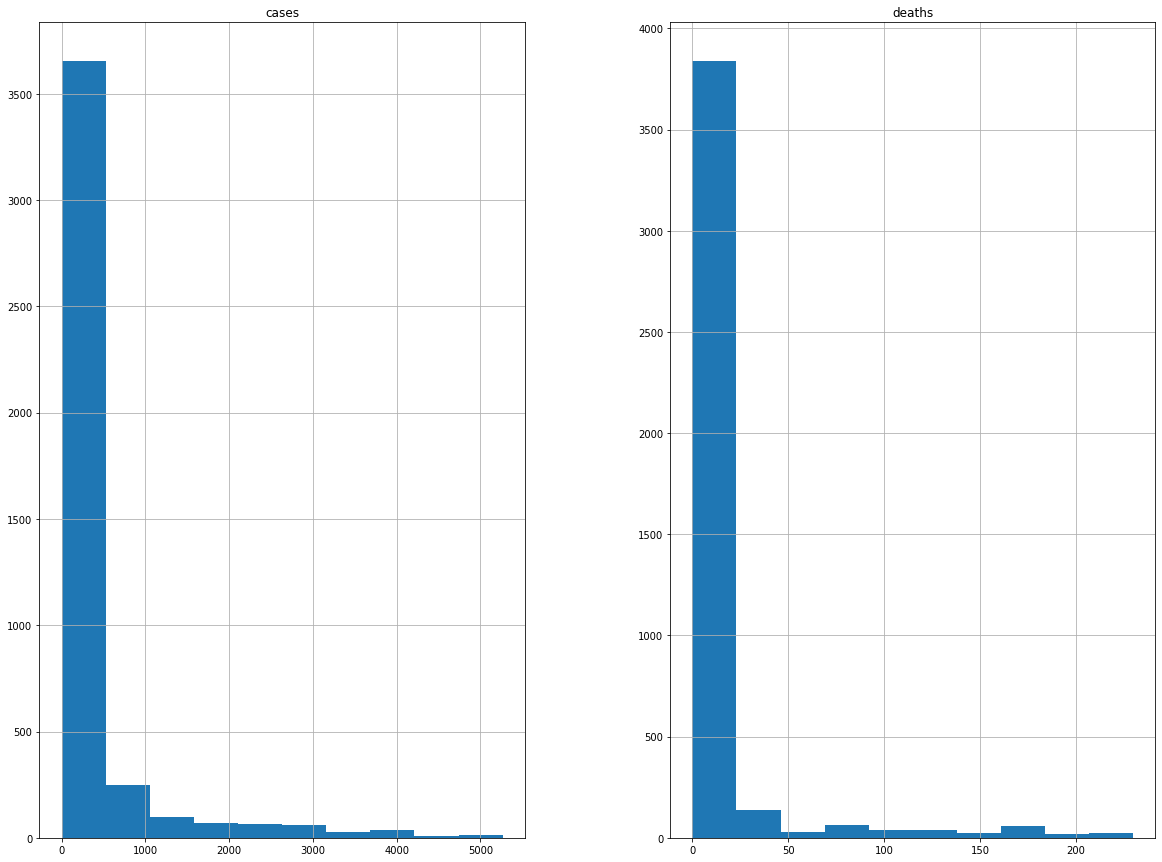

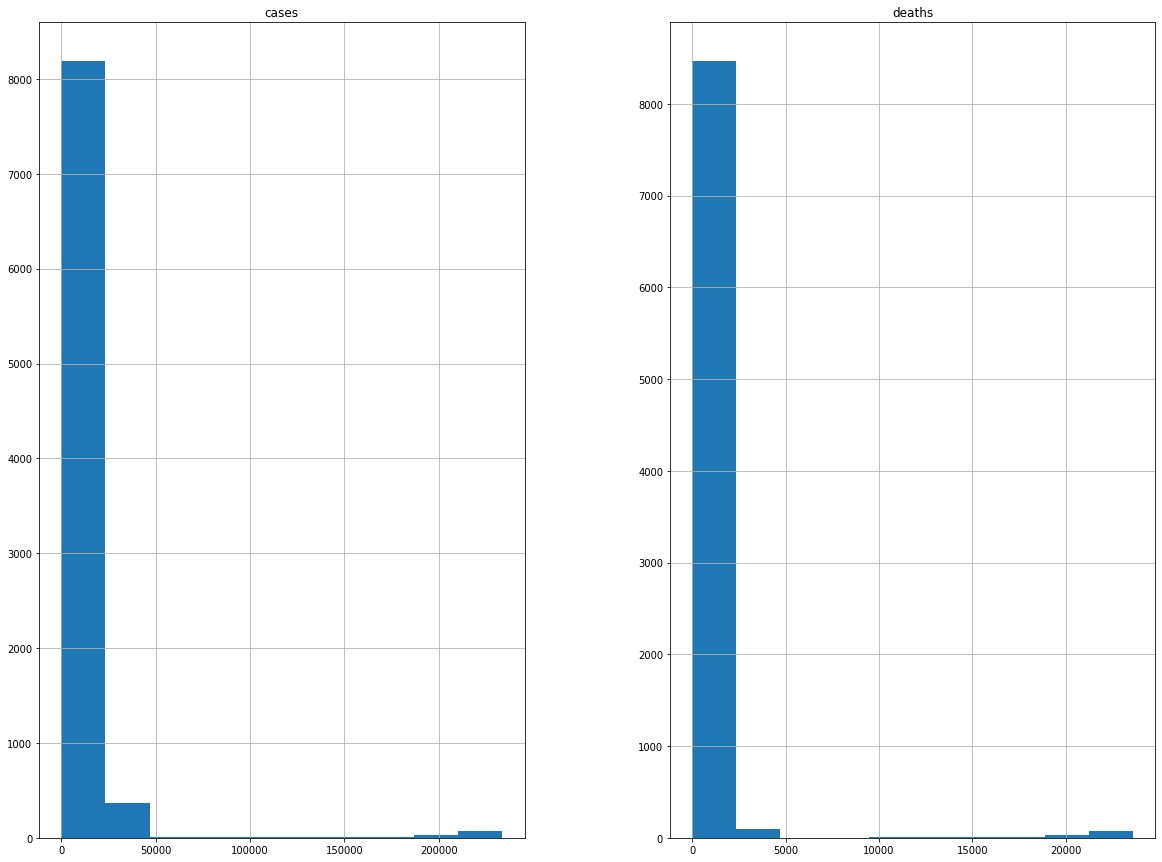

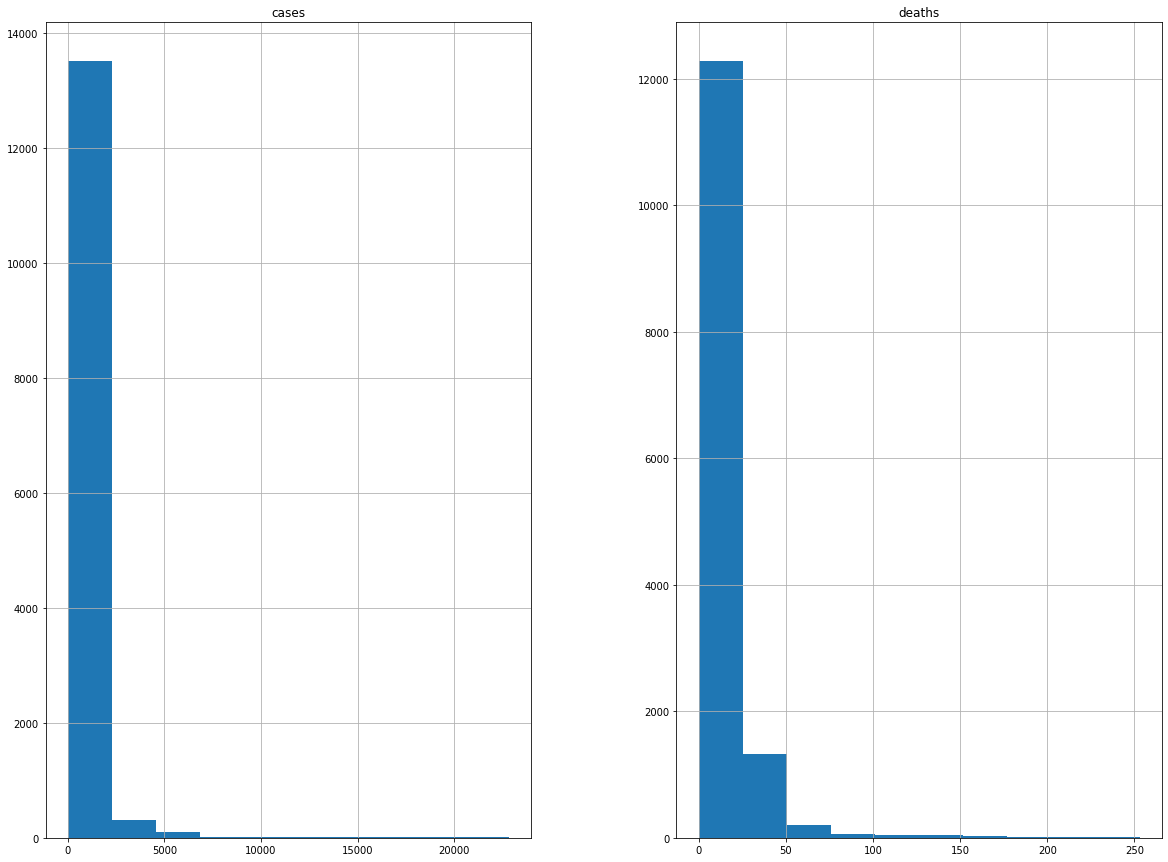

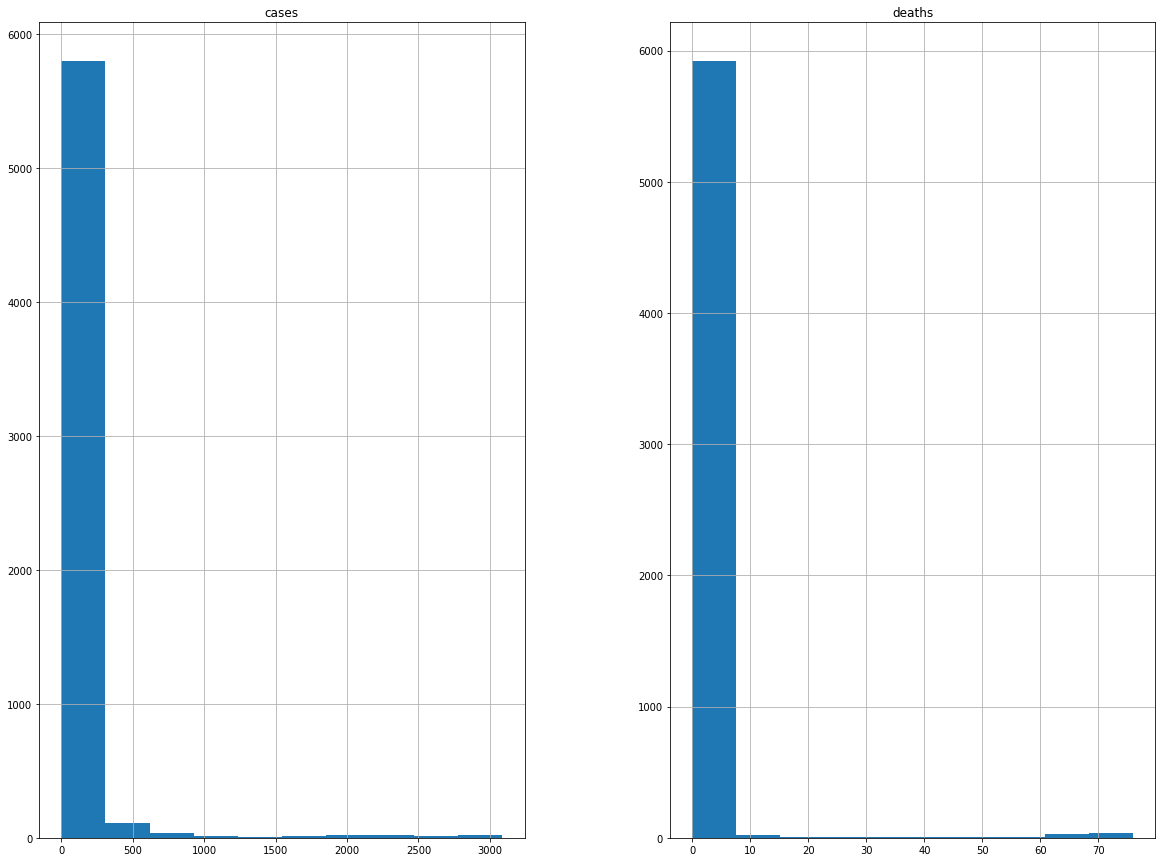

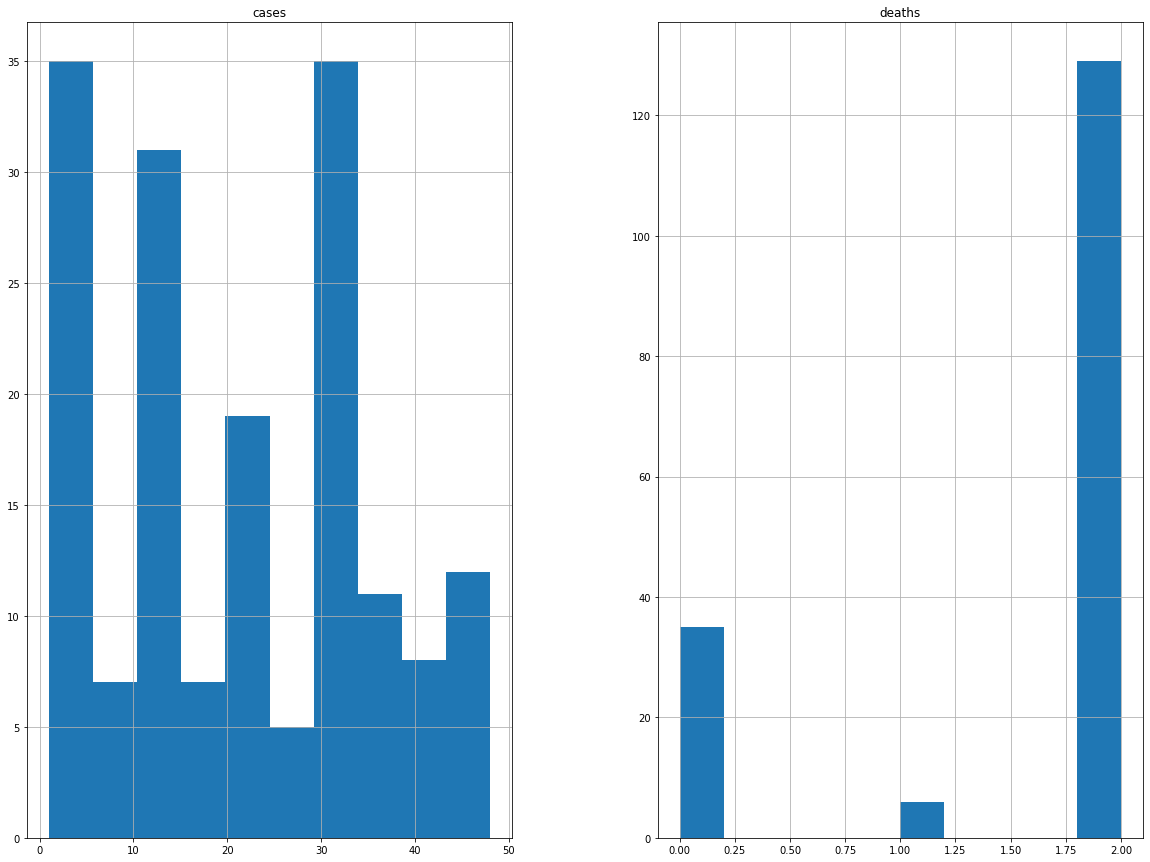

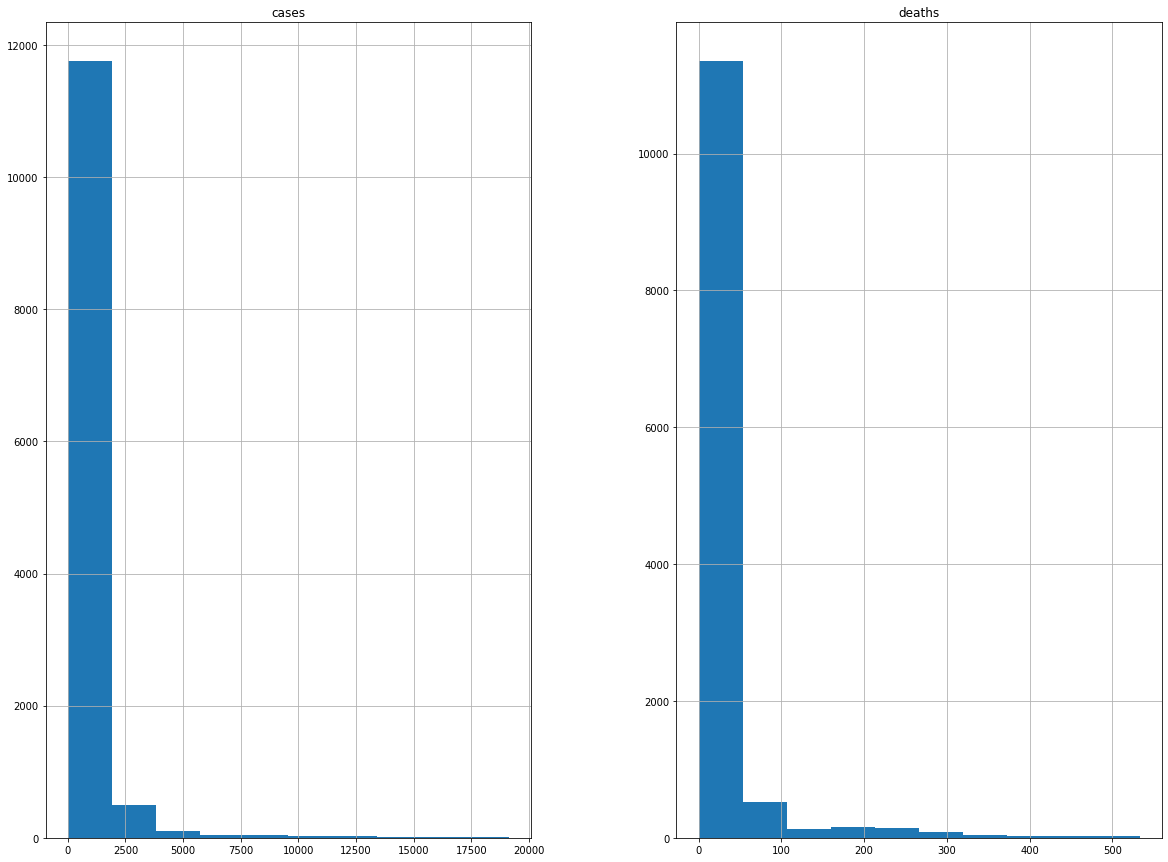

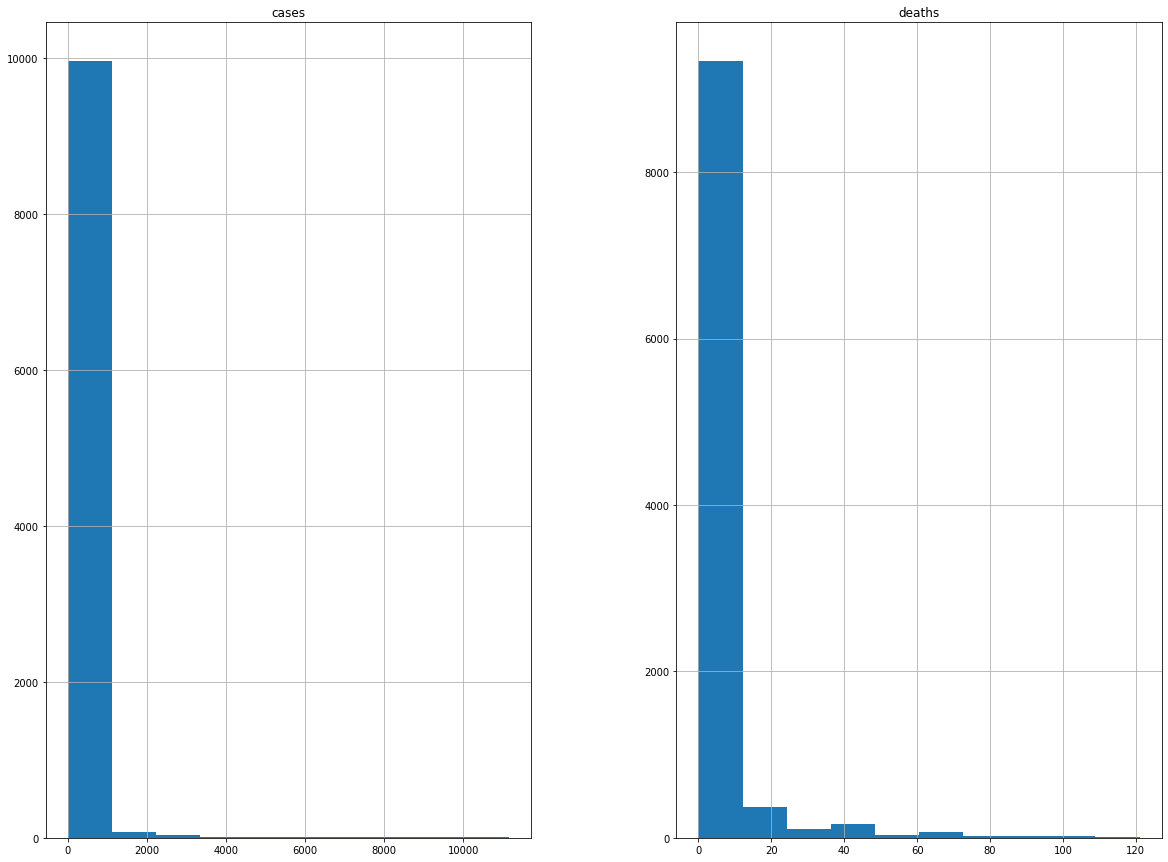

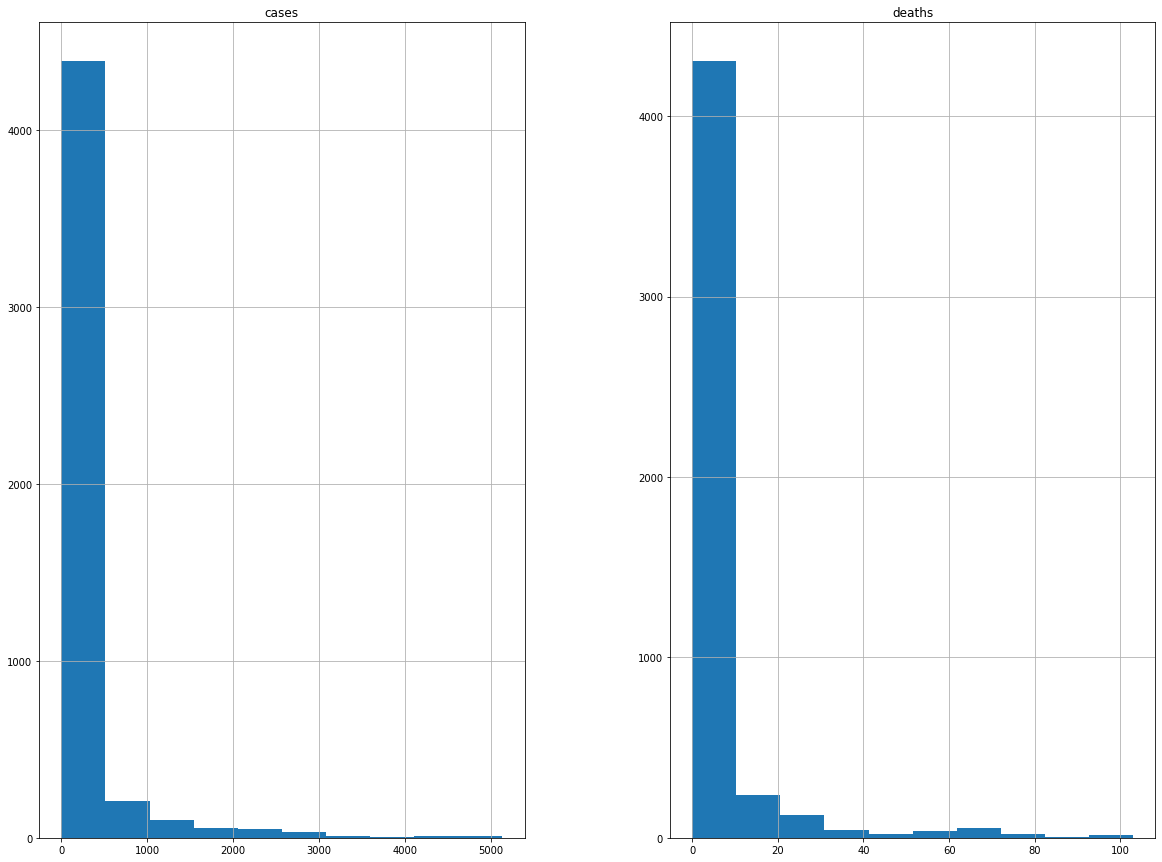

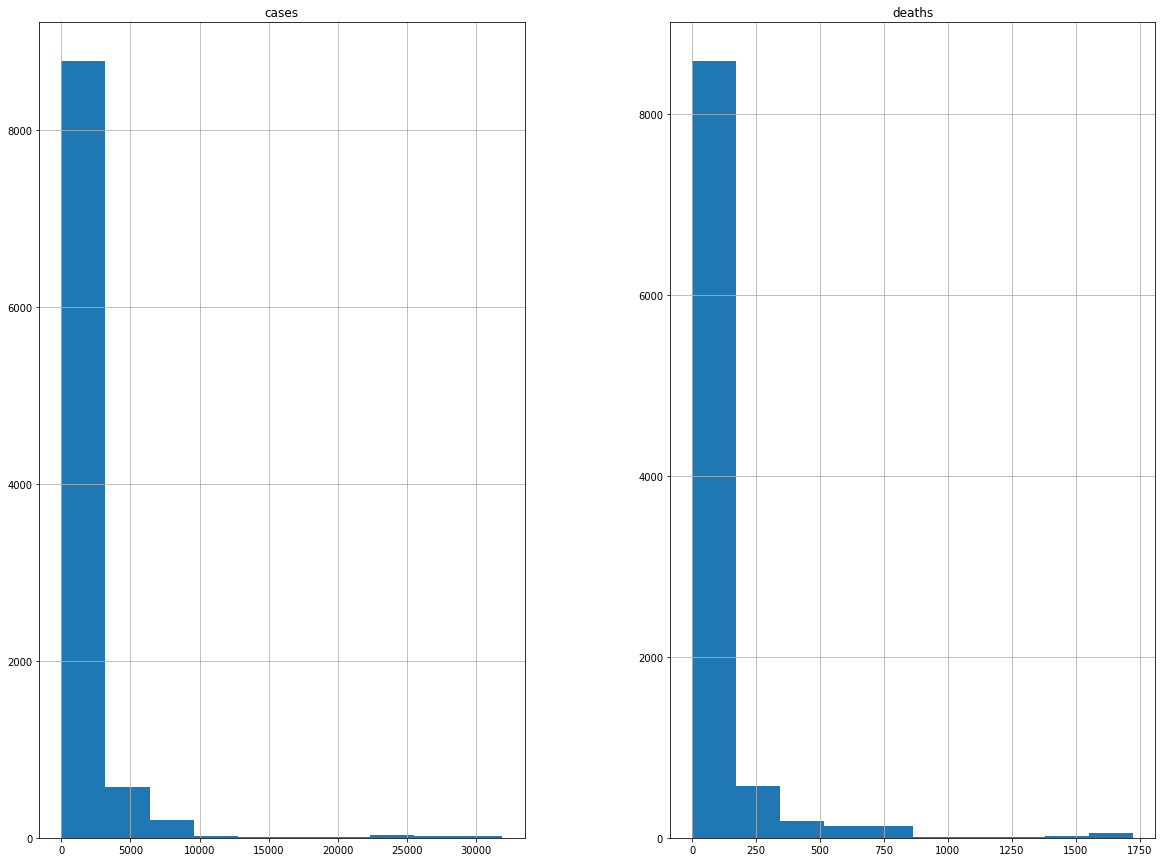

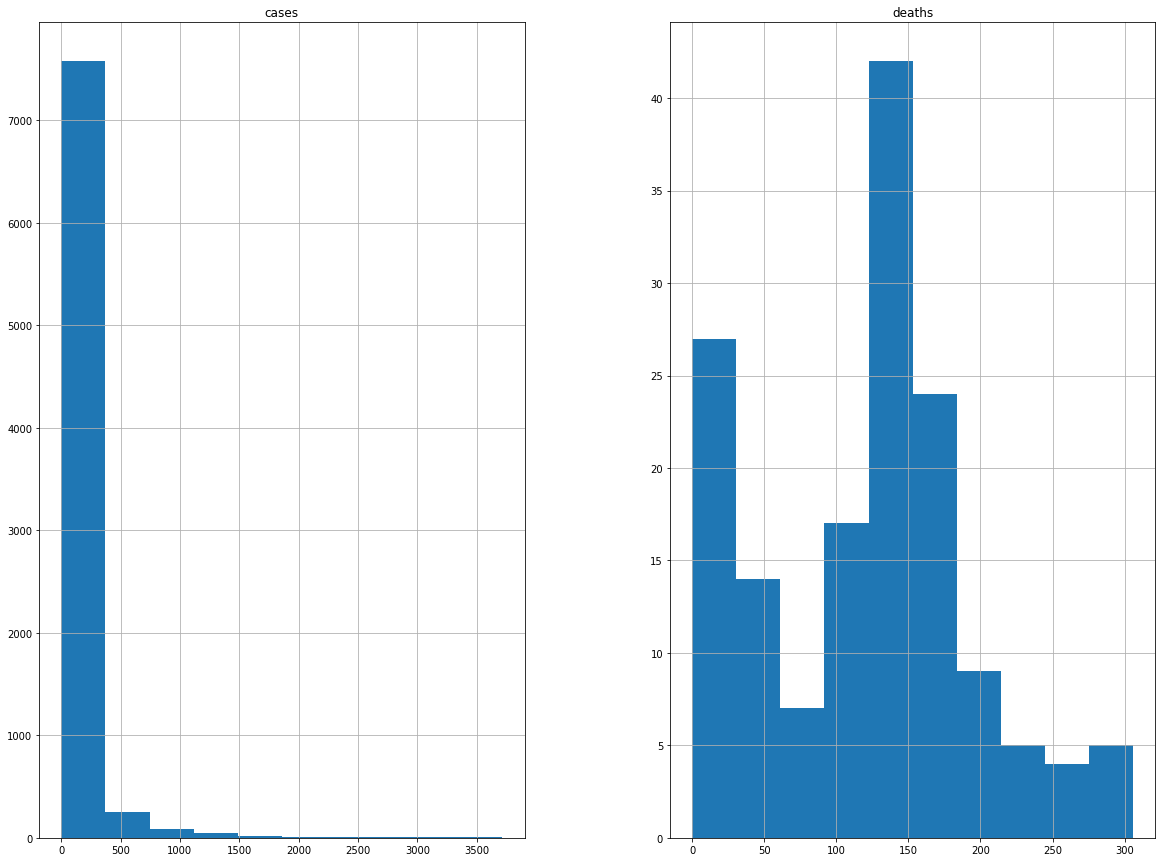

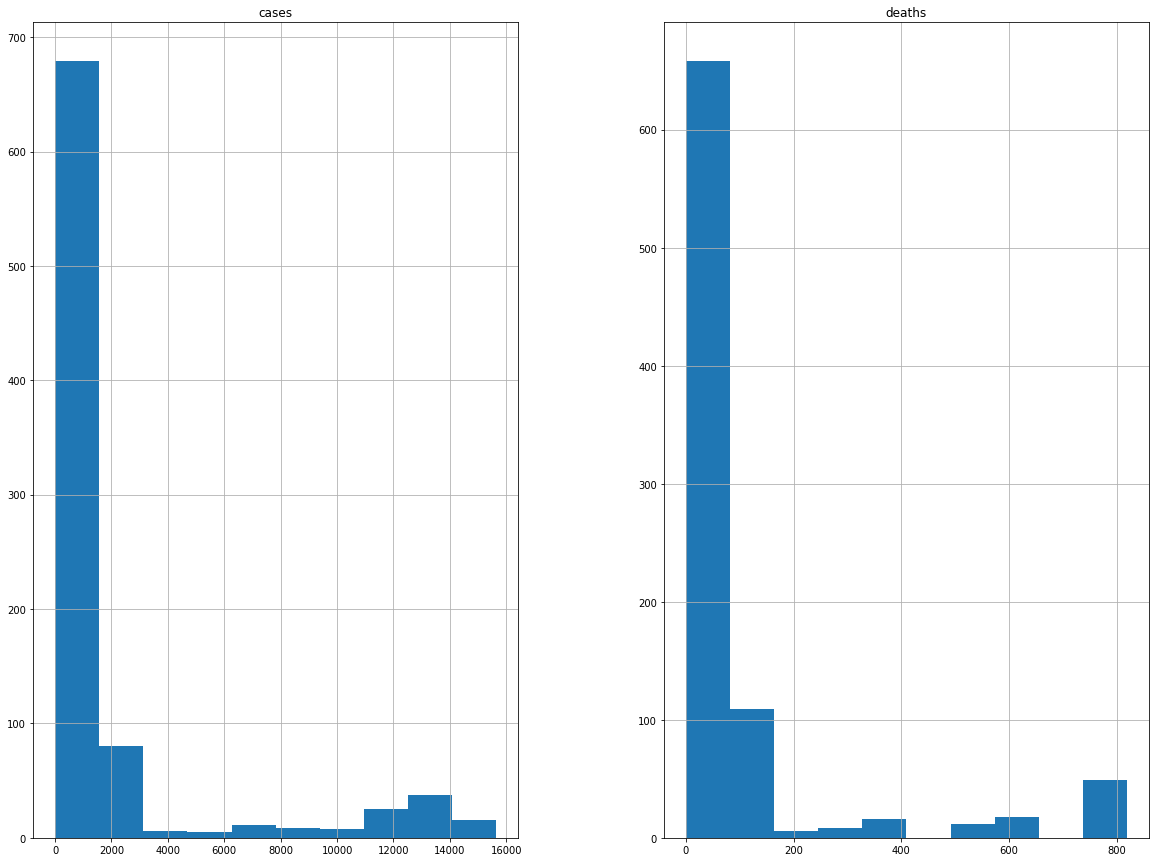

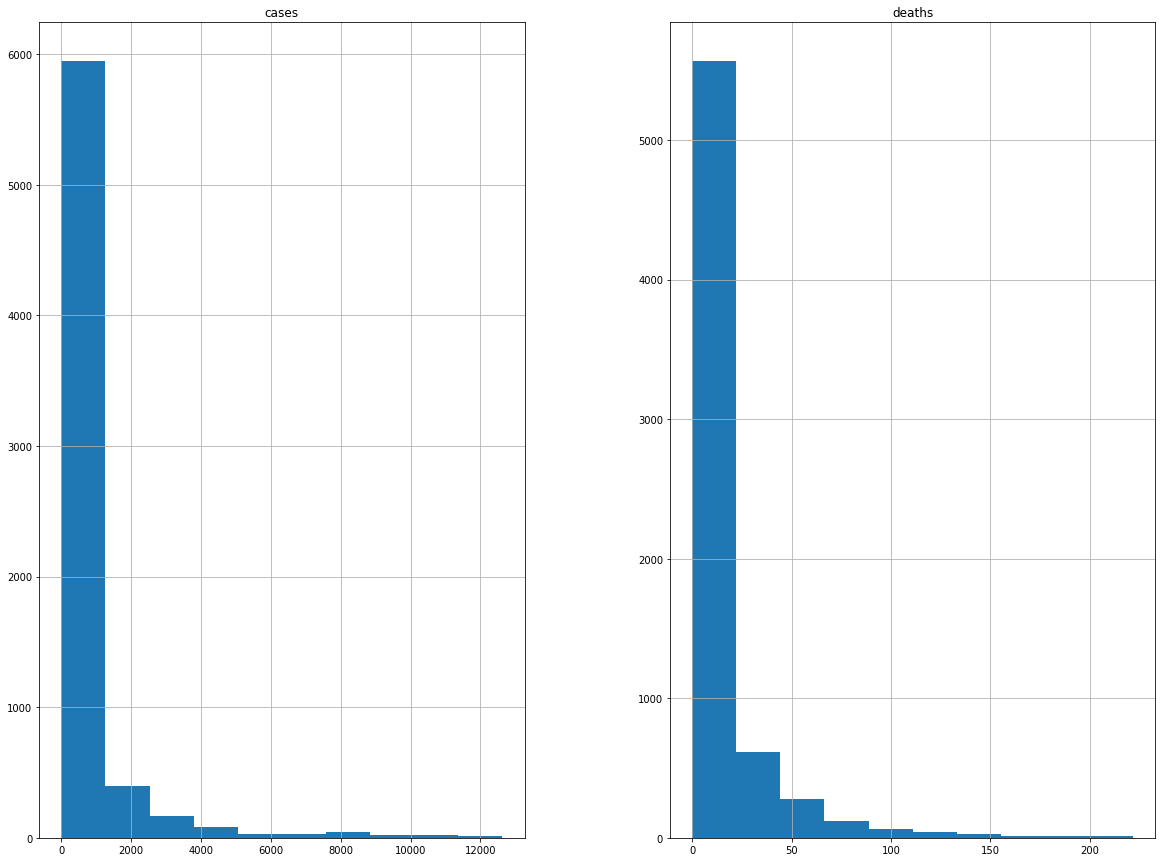

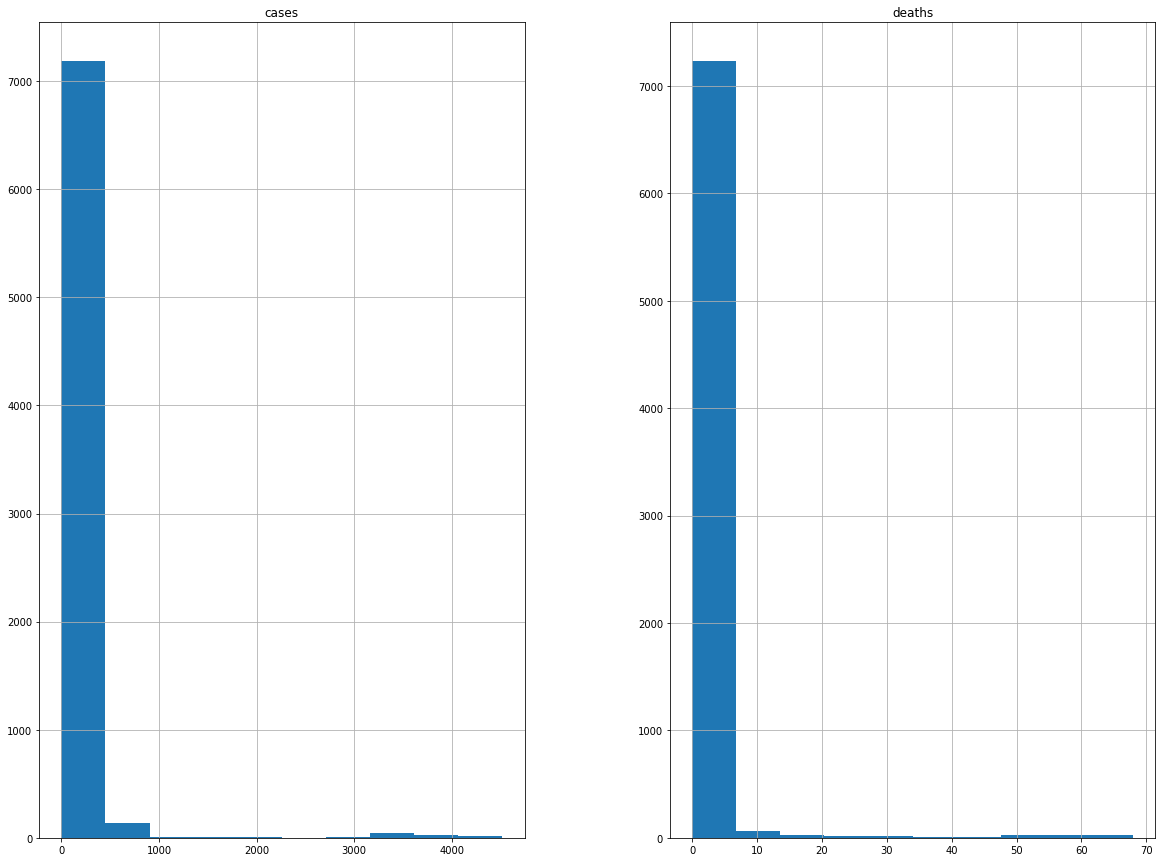

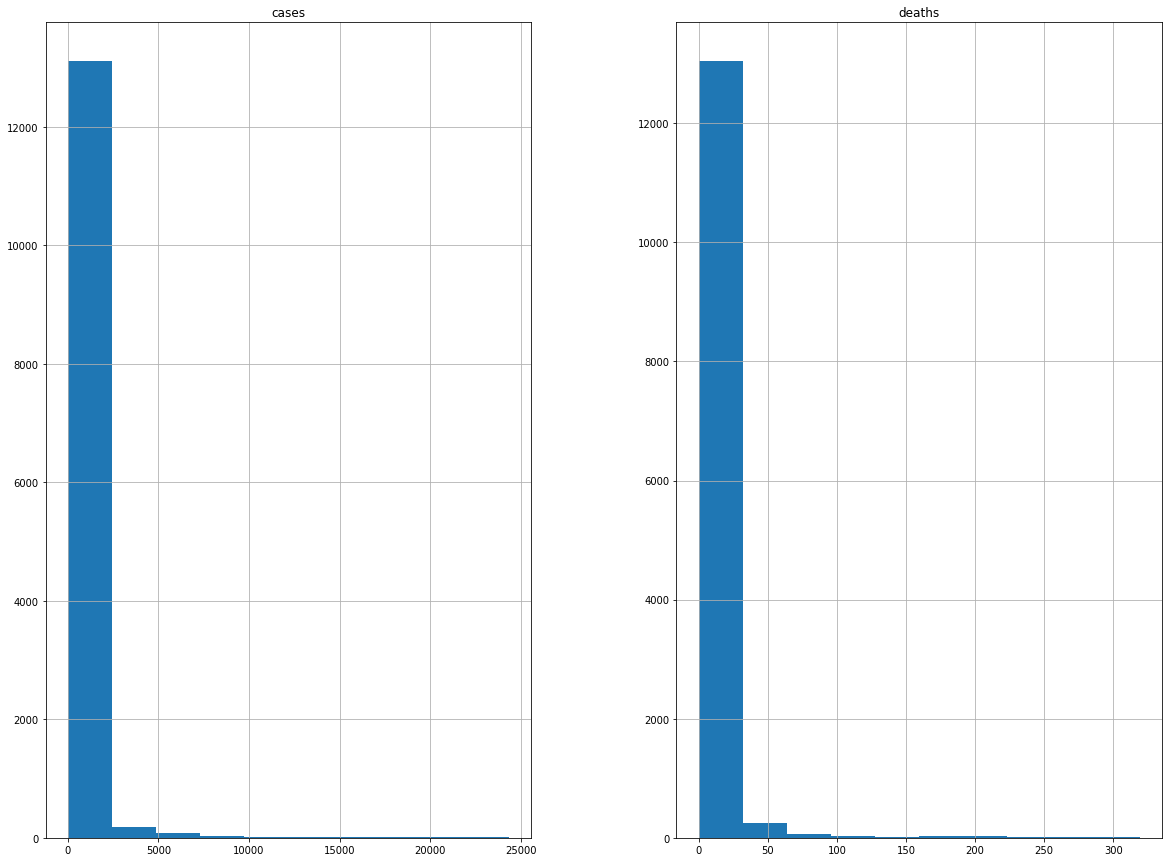

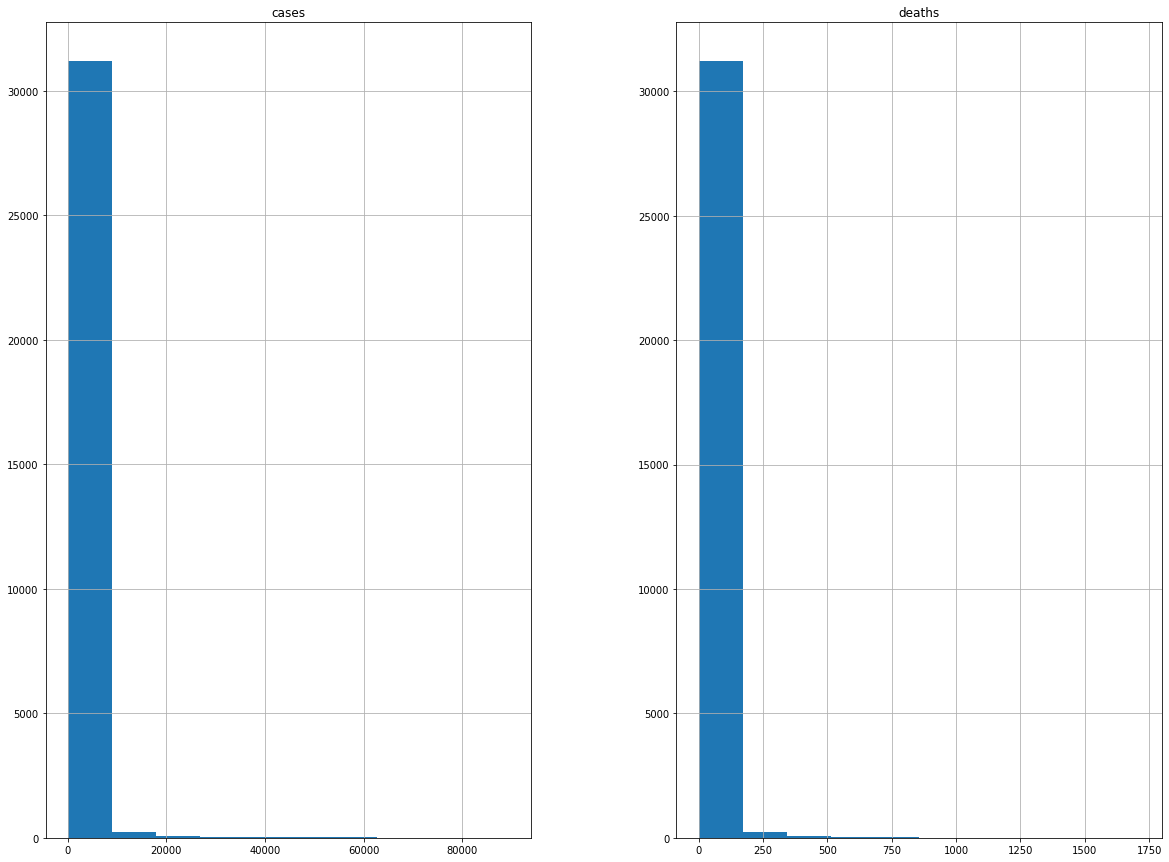

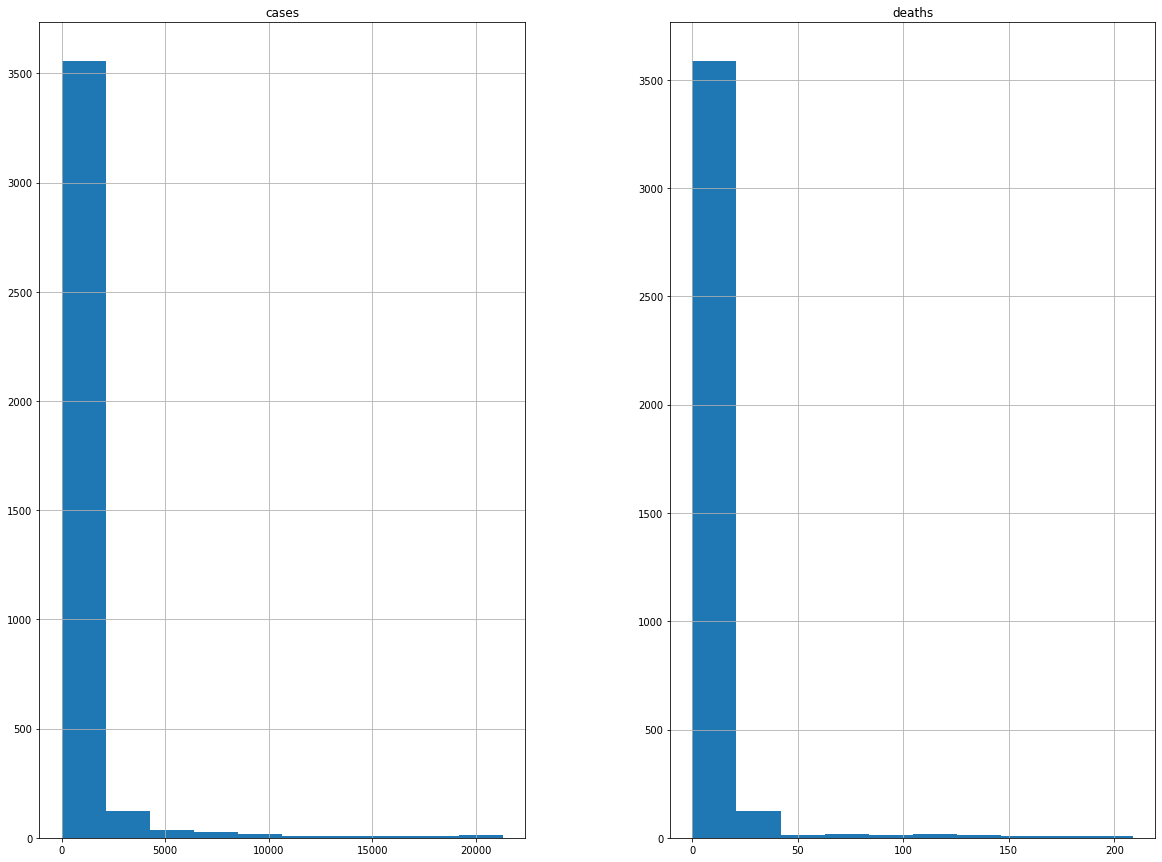

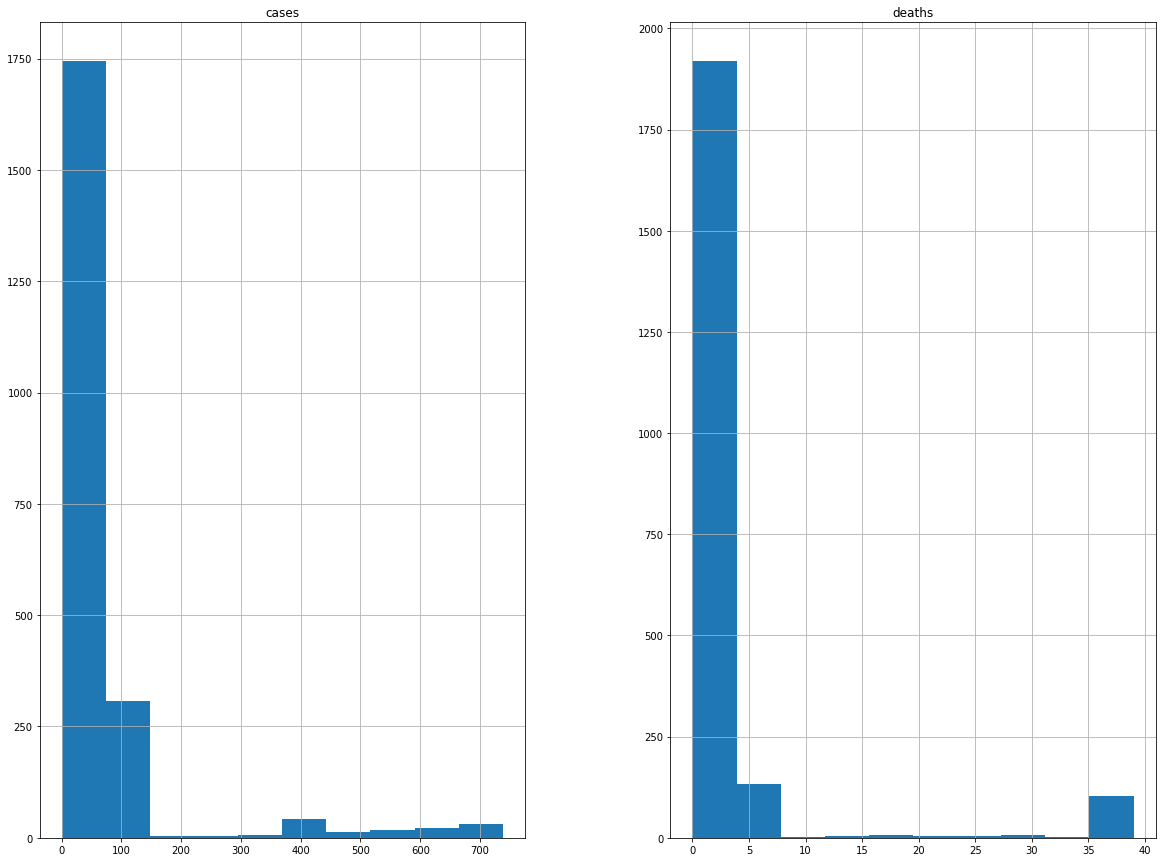

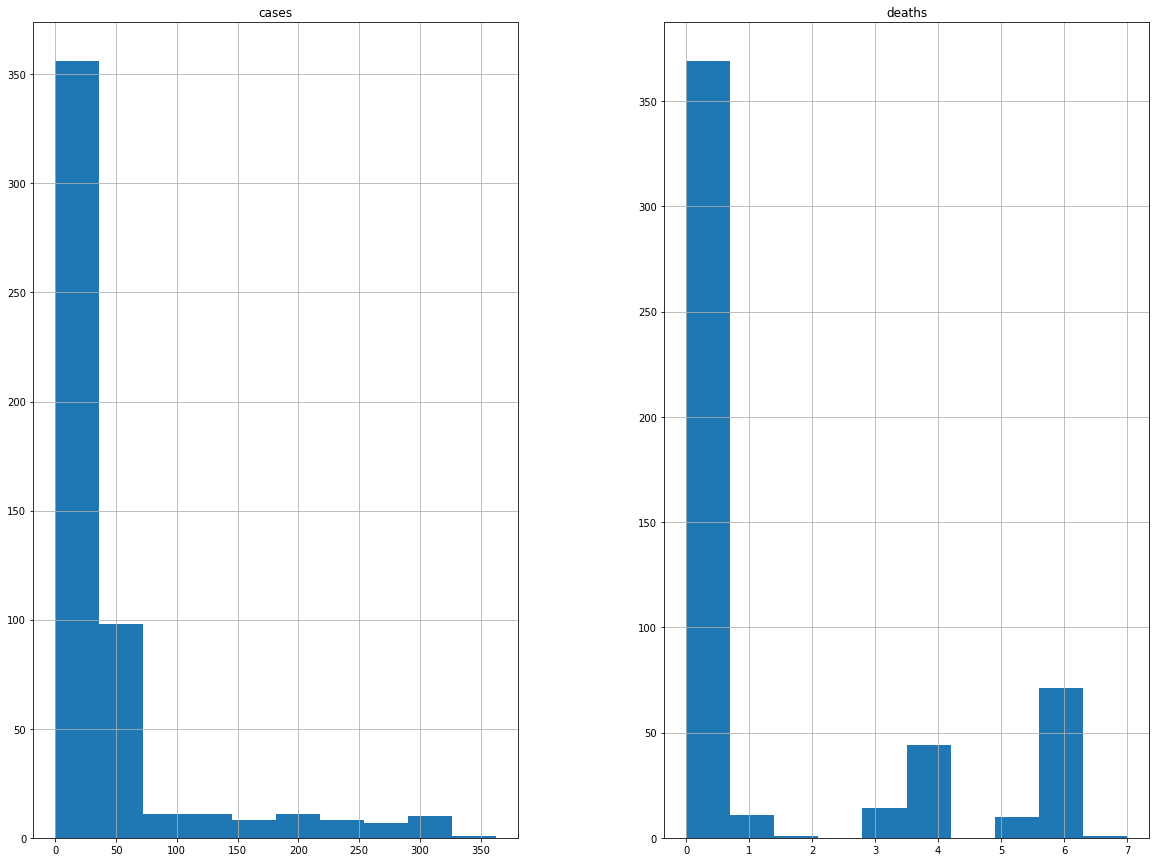

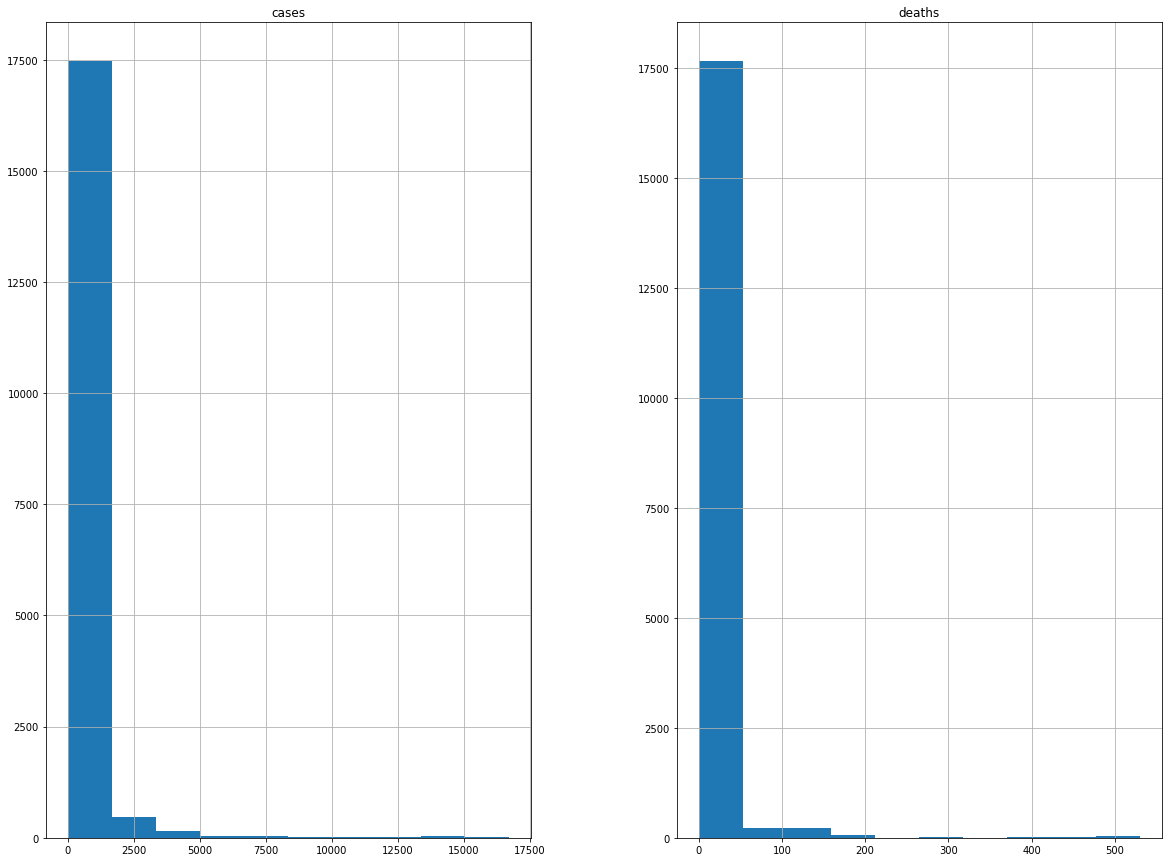

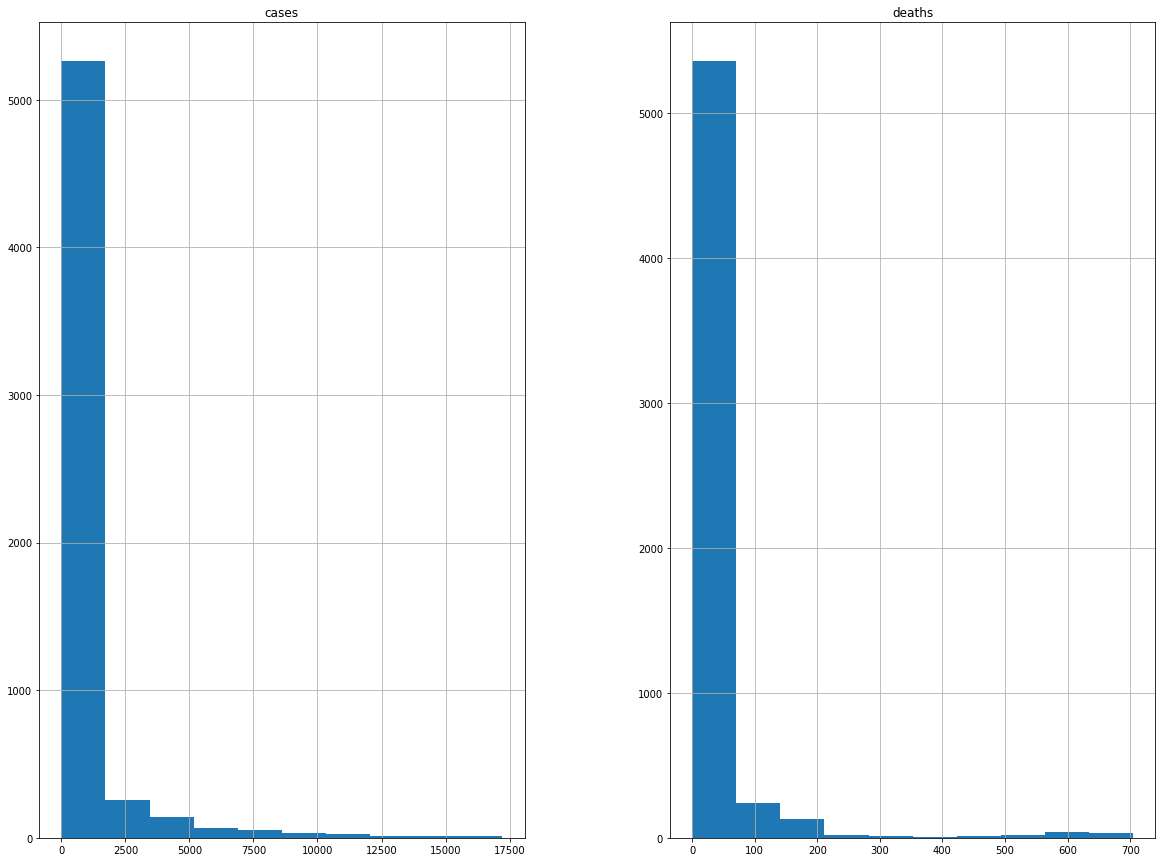

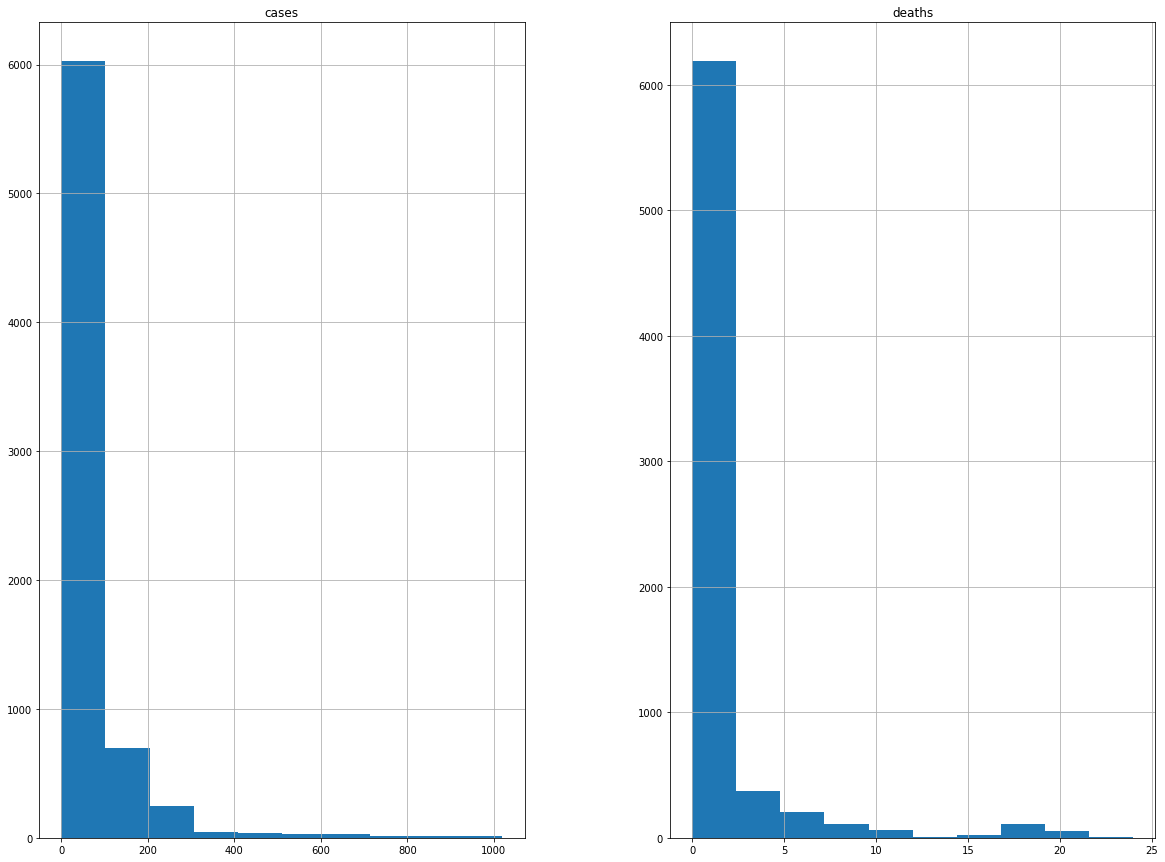

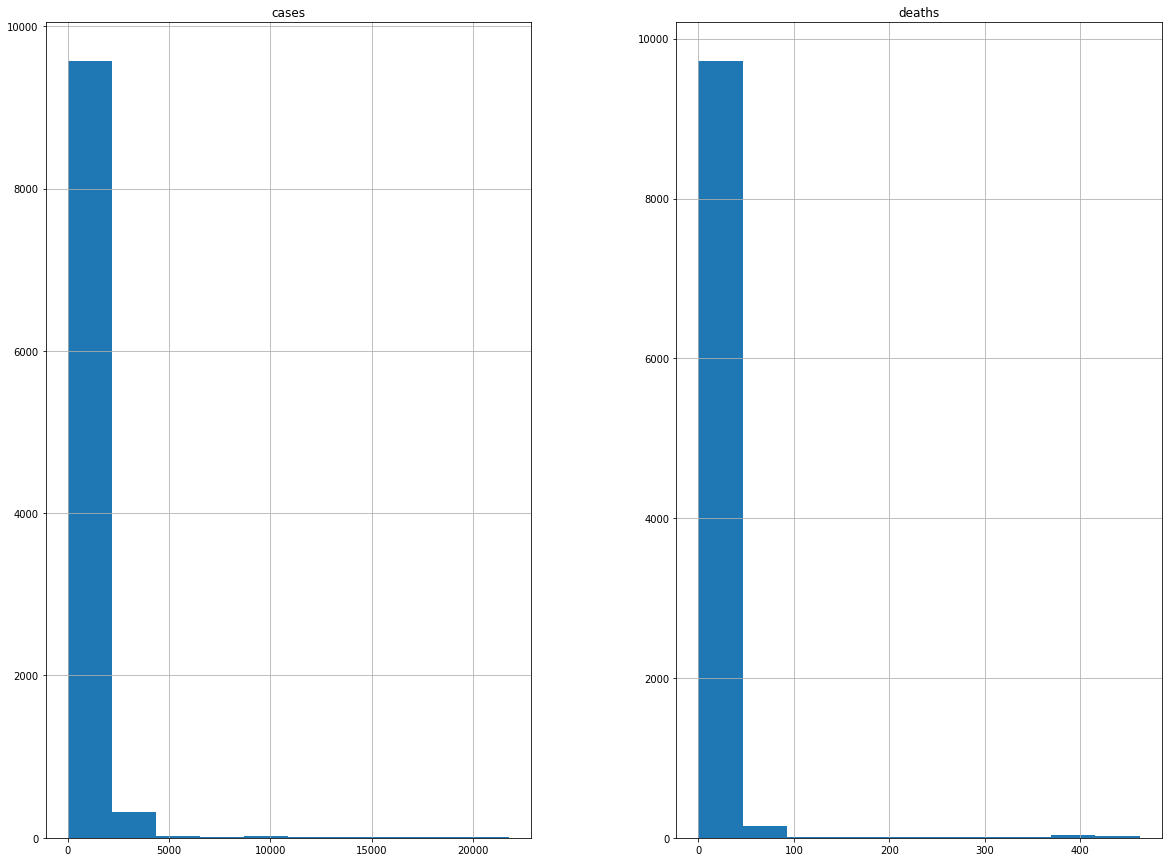

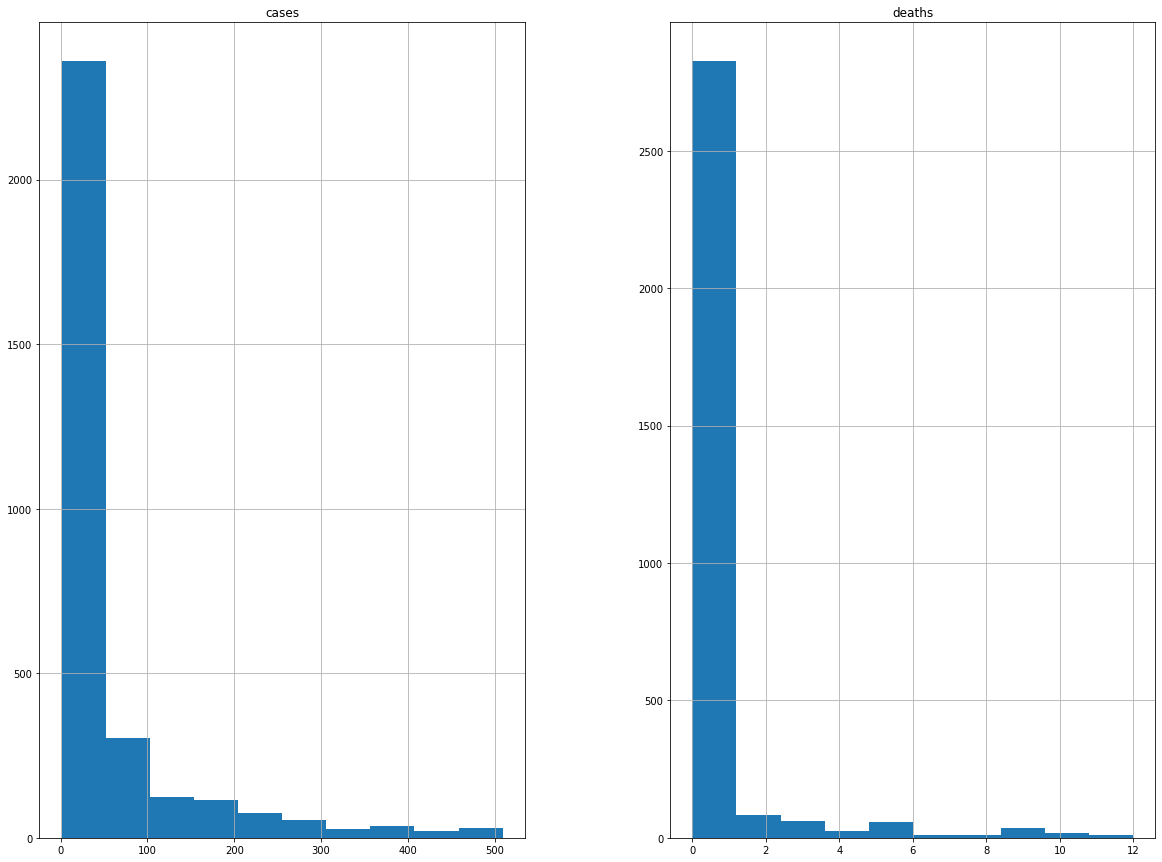

In [ ]:
for s in states:
  states_data[states_data.state==s].hist(bins=10, figsize=(20, 15))
plt.show()

**using prophet model to forecast complete states cases and deaths**

In [4]:
states_data.drop([ 'deaths'], axis=1, inplace=True)

In [5]:
states_data.drop(['state'], axis=1, inplace=True)

In [ ]:
states_data.head()

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,1
4,2020-01-24,1


In [6]:
states_data.rename(columns = {'date':'ds', 'cases':'y'}, inplace = True)

In [7]:
from prophet import Prophet

In [8]:
m = Prophet()
m.fit(states_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6guckmqz/7sg_7y5j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6guckmqz/eu158jrr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52534', 'data', 'file=/tmp/tmp6guckmqz/7sg_7y5j.json', 'init=/tmp/tmp6guckmqz/eu158jrr.json', 'output', 'file=/tmp/tmp6guckmqz/prophet_model_5zzhs0q/prophet_model-20221126151919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:19:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:19:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
forecast = m.make_future_dataframe(periods=365)
forecast.tail()



,ds
515,2021-06-19
516,2021-06-20
517,2021-06-21
518,2021-06-22
519,2021-06-23


In [10]:
forecast = m.predict(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
515,2021-06-19,3536.557501,-1515.046909,8474.537424
516,2021-06-20,3543.694198,-1671.159226,8878.021697
517,2021-06-21,3551.039759,-1582.686995,8688.157522
518,2021-06-22,3561.141250,-1369.896531,9214.103084
519,2021-06-23,3564.718156,-1935.358678,8850.013328


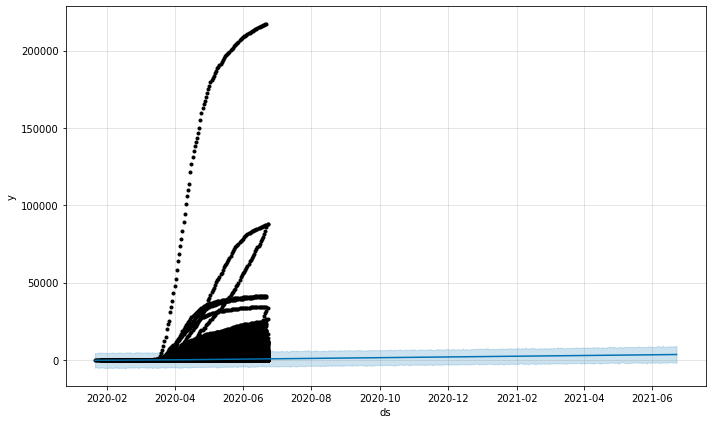

In [11]:
fig1 = m.plot(forecast)

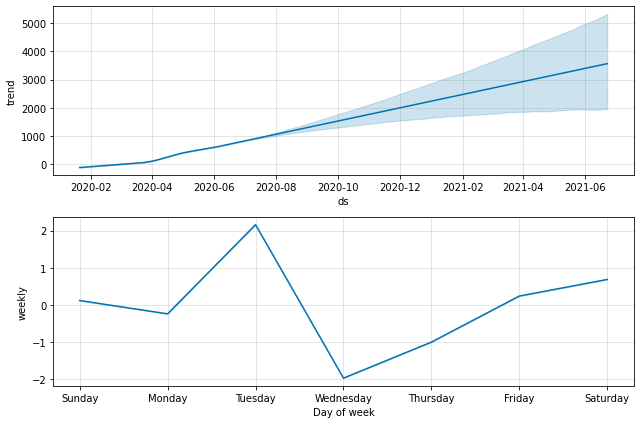

In [12]:
fig2 = m.plot_components(forecast)

**deaths forecast for all states using prophet**

In [16]:
states_data = pd.read_csv('us_counties_covid19_daily.csv')

In [ ]:
states_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [17]:
states_data.info()
states_data.isnull().sum()
states_data.sort_values('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    800437 non-null  object 
 1   county  800437 non-null  object 
 2   state   800437 non-null  object 
 3   fips    792846 non-null  float64
 4   cases   800437 non-null  int64  
 5   deaths  783704 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 36.6+ MB


In [18]:
states_data.drop(['county', 'fips'], axis=1, inplace=True)

In [19]:
states_data.drop([ 'cases'], axis=1, inplace=True)

In [20]:
states_data.drop(['state'], axis=1, inplace=True)

In [21]:
states_data.rename(columns = {'date':'ds', 'deaths':'y'}, inplace = True)

In [22]:
from prophet import Prophet

In [23]:
states_data.head()

,ds,y
0,2020-01-21,0.0
1,2020-01-22,0.0
2,2020-01-23,0.0
3,2020-01-24,0.0
4,2020-01-24,0.0


In [24]:
m = Prophet()
m.fit(states_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6guckmqz/zf09m09_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6guckmqz/ptbysoyz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75781', 'data', 'file=/tmp/tmp6guckmqz/zf09m09_.json', 'init=/tmp/tmp6guckmqz/ptbysoyz.json', 'output', 'file=/tmp/tmp6guckmqz/prophet_modelssnj0x92/prophet_model-20221126152854.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:28:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:29:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
forecast = m.make_future_dataframe(periods=365)
forecast.tail()



,ds
680,2021-12-01
681,2021-12-02
682,2021-12-03
683,2021-12-04
684,2021-12-05


In [26]:
forecast = m.predict(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
680,2021-12-01,200.554511,-368.071663,789.539464
681,2021-12-02,200.946455,-362.189025,770.147404
682,2021-12-03,201.325552,-394.647090,770.473155
683,2021-12-04,201.620446,-395.161863,766.323582
684,2021-12-05,201.718081,-369.474605,753.640881


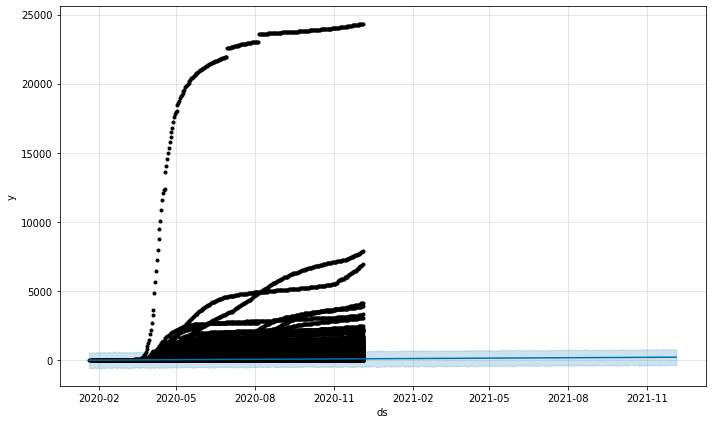

In [27]:
fig1 = m.plot(forecast)

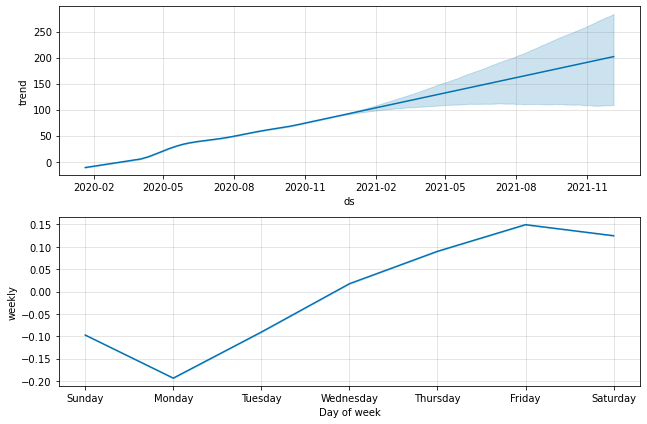

In [28]:
fig2 = m.plot_components(forecast)

**forecasting each state cases and deaths**

In [29]:
states_data = pd.read_csv('us_counties_covid19_daily.csv')

In [ ]:
states_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [30]:
states_data.info()
states_data.isnull().sum()
states_data.sort_values('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    800437 non-null  object 
 1   county  800437 non-null  object 
 2   state   800437 non-null  object 
 3   fips    792846 non-null  float64
 4   cases   800437 non-null  int64  
 5   deaths  783704 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 36.6+ MB


In [31]:
states_data.drop(['county', 'fips'], axis=1, inplace=True)

**select the desired state**

In [32]:

states_data= states_data.loc[(states_data['state'] == 'Washington') ]

In [ ]:
states_data.head()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0.0
1,2020-01-22,Washington,1,0.0
2,2020-01-23,Washington,1,0.0
4,2020-01-24,Washington,1,0.0
7,2020-01-25,Washington,1,0.0


**forecasting for deaths**

In [33]:
states_data.drop(['state', 'cases'], axis=1, inplace=True)

In [ ]:
states_data.head()

,date,deaths
0,2020-01-21,0.0
1,2020-01-22,0.0
2,2020-01-23,0.0
4,2020-01-24,0.0
7,2020-01-25,0.0


In [34]:
states_data.rename(columns = {'date':'ds', 'deaths':'y'}, inplace = True)

In [35]:
from prophet import Prophet

In [36]:
m = Prophet()
m.fit(states_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6guckmqz/5yvgm_fg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6guckmqz/vyw0x7_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28517', 'data', 'file=/tmp/tmp6guckmqz/5yvgm_fg.json', 'init=/tmp/tmp6guckmqz/vyw0x7_q.json', 'output', 'file=/tmp/tmp6guckmqz/prophet_modelvbj4bcbv/prophet_model-20221126153250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:32:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:32:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
forecast = m.make_future_dataframe(periods=365)
forecast.tail()



,ds
680,2021-12-01
681,2021-12-02
682,2021-12-03
683,2021-12-04
684,2021-12-05


In [38]:
forecast = m.predict(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
680,2021-12-01,154.052831,7.902650,299.095062
681,2021-12-02,154.351194,7.232019,294.401675
682,2021-12-03,154.591466,4.547563,291.820713
683,2021-12-04,154.714479,16.065821,306.422570
684,2021-12-05,154.657232,6.389220,307.719792


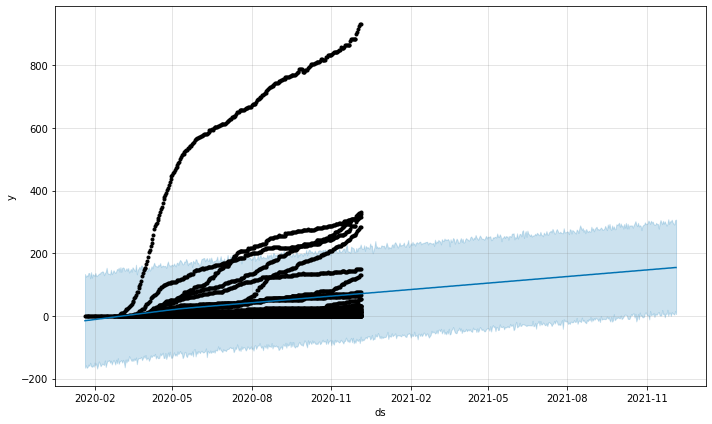

In [39]:
fig1 = m.plot(forecast)

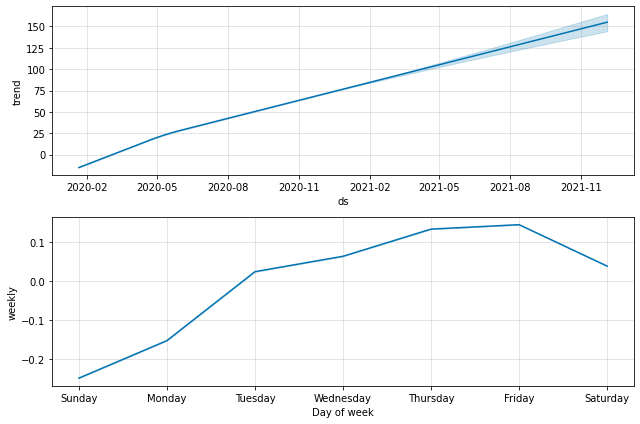

In [40]:
fig2 = m.plot_components(forecast)

In [41]:
states_data = pd.read_csv('us_counties_covid19_daily.csv')

In [ ]:
states_data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [42]:
states_data.info()
states_data.isnull().sum()
states_data.sort_values('date', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    800437 non-null  object 
 1   county  800437 non-null  object 
 2   state   800437 non-null  object 
 3   fips    792846 non-null  float64
 4   cases   800437 non-null  int64  
 5   deaths  783704 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 36.6+ MB


In [43]:
states_data.drop(['county', 'fips'], axis=1, inplace=True)

**select the desired state**

In [44]:

states_data= states_data.loc[(states_data['state'] == 'Washington') ]

In [45]:
states_data.head()

,date,state,cases,deaths
0,2020-01-21,Washington,1,0.0
1,2020-01-22,Washington,1,0.0
2,2020-01-23,Washington,1,0.0
4,2020-01-24,Washington,1,0.0
7,2020-01-25,Washington,1,0.0


**forecasting for cases**

In [46]:
states_data.drop(['state', 'deaths'], axis=1, inplace=True)

In [ ]:
states_data.head()

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
4,2020-01-24,1
7,2020-01-25,1


In [47]:
states_data.rename(columns = {'date':'ds', 'cases':'y'}, inplace = True)

In [48]:
from prophet import Prophet

In [49]:
m = Prophet()
m.fit(states_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6guckmqz/nmvzrfl8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6guckmqz/jmydx65c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38300', 'data', 'file=/tmp/tmp6guckmqz/nmvzrfl8.json', 'init=/tmp/tmp6guckmqz/jmydx65c.json', 'output', 'file=/tmp/tmp6guckmqz/prophet_modeljqb97ou_/prophet_model-20221126153654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:36:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:36:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [50]:
forecast = m.make_future_dataframe(periods=365)
forecast.tail()



,ds
680,2021-12-01
681,2021-12-02
682,2021-12-03
683,2021-12-04
684,2021-12-05


In [51]:
forecast = m.predict(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
680,2021-12-01,15659.861320,10032.940999,20851.351297
681,2021-12-02,15694.519001,10494.648346,20777.474719
682,2021-12-03,15729.182705,10359.196844,20645.879509
683,2021-12-04,15758.602813,10685.050683,20731.471713
684,2021-12-05,15775.212562,10619.321858,20689.282494


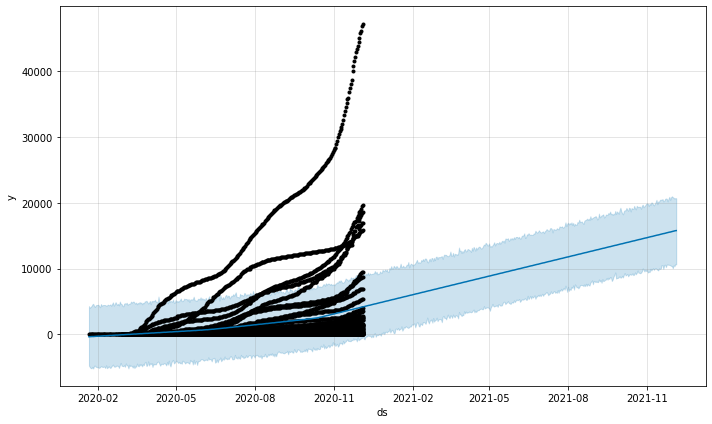

In [52]:
fig1 = m.plot(forecast)

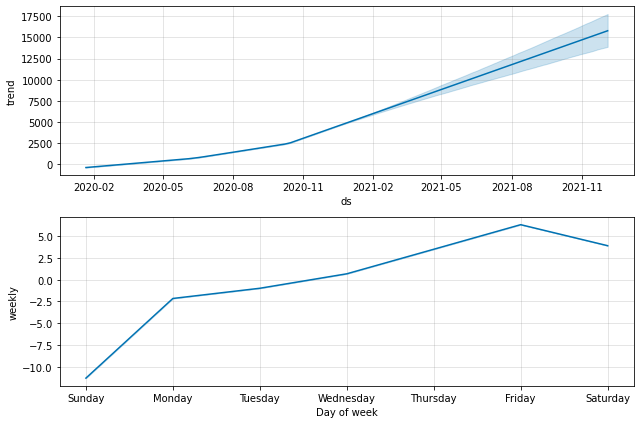

In [53]:
fig2 = m.plot_components(forecast)